In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import tree
from sklearn import ensemble
from sklearn import neighbors
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Import RFE
from sklearn.feature_selection import RFE
import statsmodels.api as sm  

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

In [2]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# Reading the dataset
data = pd.read_csv("survey.csv")

In [4]:
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [5]:
data.shape

(1259, 27)

In [6]:
#Summary of dataset: 1259 rows and 27 columns
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [7]:
col_list = data.columns.tolist()
print(col_list)

['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed', 'family_history', 'treatment', 'work_interfere', 'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence', 'comments']


In [8]:
data.isna().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [9]:
data["Gender"].value_counts()

Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
Female                                              2
Trans woman                                         1
msle                                                1
male leaning androgynous                            1
Neuter                      

In [10]:
data=data.replace(to_replace=["Male","male","M","m","Make","Cis Male","Man","msle","cis male","Mail","Malr","Cis Man","Male-ish","maile","Mal","Male (CIS)","Male"], value="male")
data=data.replace(to_replace=["female","f","F","Woman","woman","Female","Female (cis)","cis-female/femme","Femake","femail","Cis Female","Female"], value="female")
data=data.replace(to_replace=["ostensibly male, unsure what that really means","Genderqueer","fluid","All","Nah","non-binary","queer/she/they","something kinda male?","Trans-female","Androgyne","Agender","Enby","Guy (-ish) ^_^","queer","Female (trans)","Neuter","male leaning androgynous","Trans woman","A little about you","p"], value="Transgender")

In [11]:
i = data[(data.Timestamp == "2014-08-27 16:01:39")].index
print(i)
data = data.drop(i)


Int64Index([461], dtype='int64')


In [12]:
j = data[(data.Timestamp == "2014-08-28 02:41:47")].index
print(j)
data = data.drop(j)

Int64Index([631], dtype='int64')


In [13]:
k = data[(data.Timestamp == "2014-08-29 01:40:36")].index
print(k)
data = data.drop(k)

Int64Index([953], dtype='int64')


In [14]:
l = data[(data.Timestamp == "2015-02-21 11:55:46")].index
print(l)
data = data.drop(l)

Int64Index([1223], dtype='int64')


In [15]:
m = data[(data.Timestamp == "2014-08-29 11:46:27")].index
print(m)
data = data.drop(m)


Int64Index([1058], dtype='int64')


In [16]:
data

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,male,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,2014-08-27 11:31:22,33,male,United States,TN,NaN,Yes,No,Sometimes,6-25,No,Yes,Yes,Not sure,No,Don't know,Don't know,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
6,2014-08-27 11:31:50,35,female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,Yes,Yes,No,No,No,No,No,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
7,2014-08-27 11:32:05,39,male,Canada,NaN,NaN,No,No,Never,1-5,Yes,Yes,No,Yes,No,No,Yes,Don't know,No,No,No,No,No,No,No,No,NaN
8,2014-08-27 11:32:39,42,female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,No,Yes,Yes,Yes,No,No,No,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
9,2014-08-27 11:32:43,23,male,Canada,NaN,NaN,No,No,Never,26-100,No,Yes,Don't know,No,Don't know,Don't know,Don't know,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN


In [17]:
data["Gender"].value_counts()

male           988
female         245
Transgender     21
Name: Gender, dtype: int64

In [18]:
#Cleaning Age Column
print(data['Age'].unique())

[         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72]


In [19]:
data['Age'].median()

31.0

In [20]:
data=data.replace(-29,31)
data=data.replace(99999999999,31)
data=data.replace(329,31)
data=data.replace(-1726,31)
data=data.replace(5,31)
data=data.replace(8,31)
data=data.replace(11,31)
data=data.replace(-1,31)

In [21]:
print(data['Age'].unique())

[37 44 32 31 33 35 39 42 23 29 36 27 46 41 34 30 40 38 50 24 18 28 26 22
 19 25 45 21 43 56 60 54 55 48 20 57 58 47 62 51 65 49 53 61 72]


In [22]:
print(data['self_employed'].unique())

[nan 'Yes' 'No']


In [23]:
data['self_employed']=data['self_employed'].fillna('No')
print(data['self_employed'].unique())
data["self_employed"].value_counts()

['No' 'Yes']


No     1108
Yes     146
Name: self_employed, dtype: int64

In [24]:
print(data['work_interfere'].unique())

['Often' 'Rarely' 'Never' 'Sometimes' nan]


In [25]:
data['work_interfere']=data['work_interfere'].fillna('Don\'t know')
print(data['work_interfere'].unique())

['Often' 'Rarely' 'Never' 'Sometimes' "Don't know"]


In [26]:
data["work_interfere"].value_counts()

Sometimes     465
Don't know    264
Never         211
Rarely        171
Often         143
Name: work_interfere, dtype: int64

In [27]:
data['comments']=data['comments'].fillna('No Comments')

In [28]:
data.isna().sum()

Timestamp                      0
Age                            0
Gender                         0
Country                        0
state                        513
self_employed                  0
family_history                 0
treatment                      0
work_interfere                 0
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
comments                       0
dtype: int64

In [29]:
#dropping columns which are of no use
data = data.drop(['state'], axis= 1)
data = data.drop(['Timestamp'], axis= 1)
data = data.drop(['no_employees'], axis= 1)

In [30]:
print(data.iloc[:20]) 

    Age  Gender         Country self_employed family_history treatment  \
0    37  female   United States            No             No       Yes   
1    44    male   United States            No             No        No   
2    32    male          Canada            No             No        No   
3    31    male  United Kingdom            No            Yes       Yes   
4    31    male   United States            No             No        No   
5    33    male   United States            No            Yes        No   
6    35  female   United States            No            Yes       Yes   
7    39    male          Canada            No             No        No   
8    42  female   United States            No            Yes       Yes   
9    23    male          Canada            No             No        No   
10   31    male   United States            No             No       Yes   
11   29    male        Bulgaria            No             No        No   
12   42  female   United States       

In [31]:
col = [ 'Gender', 'Country', 'self_employed', 'family_history', 'treatment', 'work_interfere', 
          'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 
          'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 
          'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence', 'comments']

In [32]:
#Encoding Data
for feature in col:
    encoded = preprocessing.LabelEncoder()
    encoded.fit(data[feature])
    data[feature] = encoded.transform(data[feature])

In [33]:
print(data.iloc[:20]) 

    Age  Gender  Country  self_employed  family_history  treatment  \
0    37       1       45              0               0          1   
1    44       2       45              0               0          0   
2    32       2        7              0               0          0   
3    31       2       44              0               1          1   
4    31       2       45              0               0          0   
5    33       2       45              0               1          0   
6    35       1       45              0               1          1   
7    39       2        7              0               0          0   
8    42       1       45              0               1          1   
9    23       2        7              0               0          0   
10   31       2       45              0               0          1   
11   29       2        6              0               0          0   
12   42       1       45              0               1          1   
13   36       2     

In [34]:
print(data['Country'].unique())

[45  7 44  6 15 34 28 42 33  0 17 36 26  5 38 10  1 21 20 39 23 41  9 25
 35  3 29 47 40 14 46 22  4 19 37 24 30 11 31 43 13  2 18 27 16  8 12 32]


In [35]:
#Data Visualization
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1254 entries, 0 to 1258
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Age                        1254 non-null   int64
 1   Gender                     1254 non-null   int32
 2   Country                    1254 non-null   int32
 3   self_employed              1254 non-null   int32
 4   family_history             1254 non-null   int32
 5   treatment                  1254 non-null   int32
 6   work_interfere             1254 non-null   int32
 7   remote_work                1254 non-null   int32
 8   tech_company               1254 non-null   int32
 9   benefits                   1254 non-null   int32
 10  care_options               1254 non-null   int32
 11  wellness_program           1254 non-null   int32
 12  seek_help                  1254 non-null   int32
 13  anonymity                  1254 non-null   int32
 14  leave                   

Text(0.5, 0, 'Age')

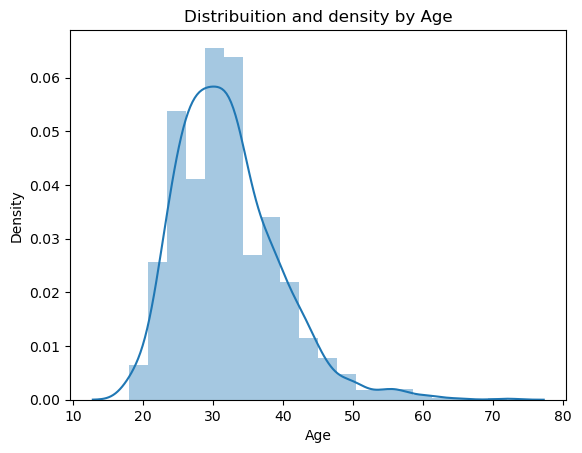

In [36]:
sns.distplot(data["Age"], bins=20)
plt.title("Distribuition and density by Age")
plt.xlabel("Age")

We see that most of our respondents age lie in between their 20s to 40s

In [37]:
data["Gender"].value_counts()

2    988
1    245
0     21
Name: Gender, dtype: int64

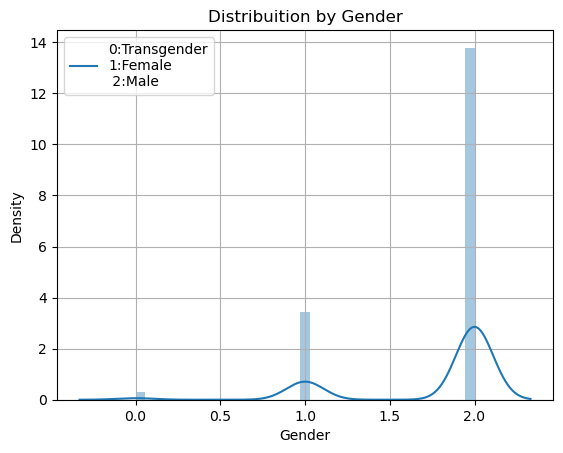

In [38]:
#Distribution of Gender
sns.distplot(data["Gender"])
plt.title("Distribuition by Gender")
plt.xlabel("Gender")
plt.grid() 
plt.legend(['0:Transgender\n1:Female\n 2:Male' ])
plt.show()


In our dataset most of the people are male followed by females

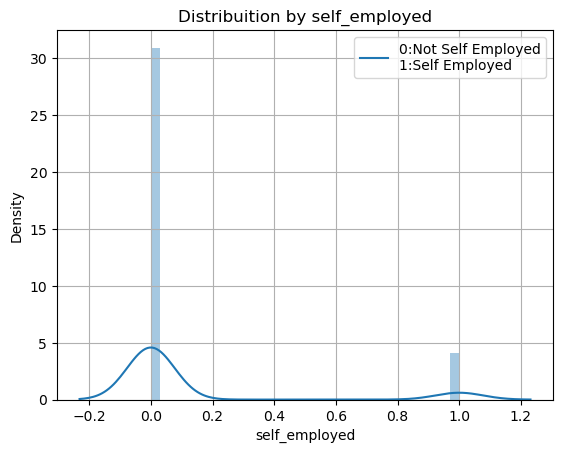

'\n0: Not Self Employed\n1: Self Employed\n\n'

In [39]:
# Distribution of self Employed 
sns.distplot(data["self_employed"])
plt.title("Distribuition by self_employed")
plt.xlabel("self_employed")
plt.grid() 
plt.legend(['0:Not Self Employed\n1:Self Employed'])
plt.show()
'''
0: Not Self Employed
1: Self Employed

'''

In our dataset 90% of the respondents are not self employed

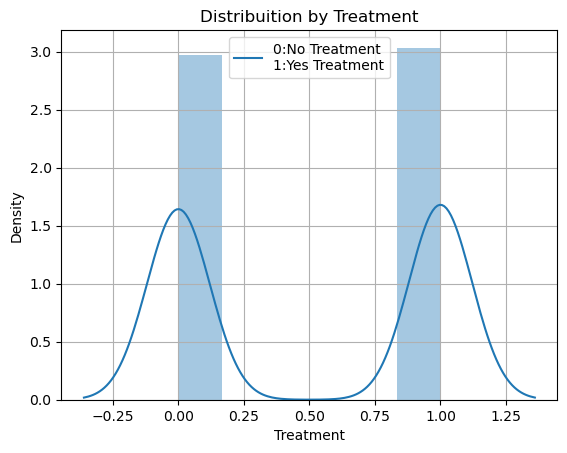

'\n0: No treatment\n1: Yes treatment\n\n'

In [40]:
# Distribution of people who took treatment 
sns.distplot(data["treatment"])
plt.title("Distribuition by Treatment")
plt.xlabel("Treatment")
plt.grid() 
plt.legend(['0:No Treatment\n1:Yes Treatment'])
plt.show()

'''
0: No treatment
1: Yes treatment

'''

Our dataset is quite balanced as 50% seeked treatment and 50% did not seek help.

'\n0: No family history\n1: yes Family History\n'

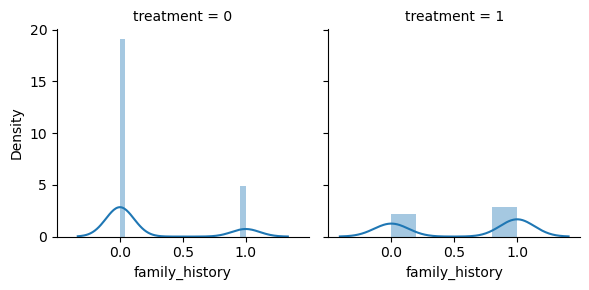

In [41]:
# Distribution of people who had a family history and seeked treatment
k = sns.FacetGrid(data, col='treatment')
k = k.map(sns.distplot, "family_history")
'''
0: No family history
1: yes Family History
'''

We observe that very less people had a family history and those who had very few seeked treatment

"\n0: Don't know\n1: Never\n2: Often\n3: Rarely\n4: Sometimes\n"

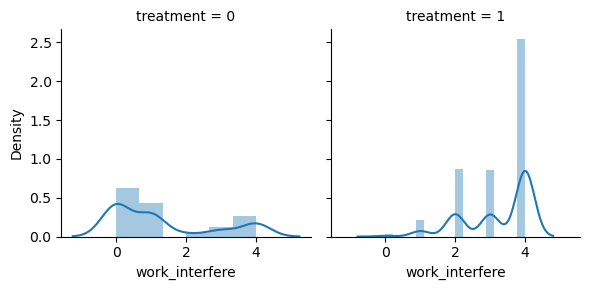

In [42]:
# Distribution of people who had a family history and seeked treatment
k = sns.FacetGrid(data, col='treatment')
k = k.map(sns.distplot, "work_interfere")
data["work_interfere"].value_counts()
'''
0: Don't know
1: Never
2: Often
3: Rarely
4: Sometimes
'''

According to the data people who responded that their mental health sometimes got in the way of work had seeked treatment and for those who never had any issue never sought any help.

'\nCare options\n0-No\n1-Not sure\n2-Yes\n'

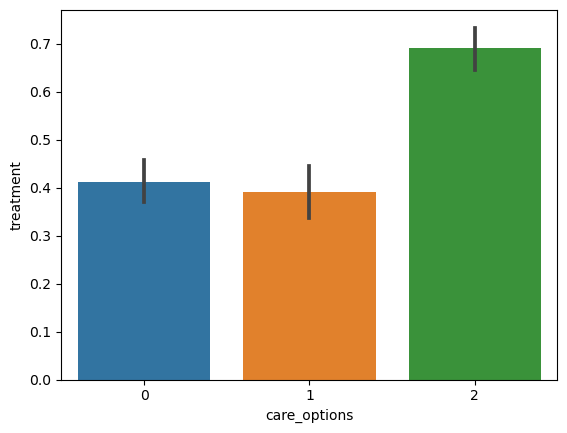

In [43]:
sns.barplot(x='care_options',y='treatment',data=data)
data["care_options"].value_counts()

"""
Care options
0-No
1-Not sure
2-Yes
"""

Those people who are aware of the care options of their company did seek treatment for their condition

In [44]:
# Correlation matrix
correlation = data.corr()
correlation

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
Age,1.000000,0.097296,0.153073,0.072446,0.004763,0.069860,0.035136,0.147672,-0.058957,0.152081,0.104481,0.100438,0.132983,0.025717,-0.007335,0.020706,-0.047868,-0.007636,0.009808,0.061483,-0.025183,-0.008092,0.074230,-0.022358
Gender,0.097296,1.000000,-0.060656,0.007676,-0.153723,-0.201527,-0.135386,0.007802,0.075884,-0.107080,-0.142380,-0.041258,-0.029268,-0.044956,0.031280,-0.032034,0.028393,0.039186,0.079115,-0.106935,-0.025930,-0.056580,-0.104094,0.041853
Country,0.153073,-0.060656,1.000000,-0.120899,0.064285,0.079818,0.029260,-0.017518,-0.041131,0.102363,0.074462,0.017571,-0.011605,0.001915,-0.104758,-0.047816,-0.014785,-0.030883,-0.003520,0.052857,-0.018316,-0.014060,-0.071715,-0.020812
self_employed,0.072446,0.007676,-0.120899,1.000000,0.010537,0.020812,0.035606,0.315942,0.080872,-0.050315,0.047453,0.009638,0.043276,0.107022,0.179650,0.030559,0.027850,0.076337,0.036999,-0.005938,-0.020260,0.140241,0.082354,0.042550
family_history,0.004763,-0.153723,0.064285,0.010537,1.000000,0.375320,0.321540,0.015622,-0.047015,0.128075,0.107362,0.068355,0.048868,0.065118,0.026881,0.025062,0.006351,-0.000925,0.007061,0.044159,0.039856,0.046039,0.128000,-0.017322
treatment,0.069860,-0.201527,0.079818,0.020812,0.375320,1.000000,0.614661,0.027505,-0.031955,0.226328,0.236445,0.097950,0.093676,0.143855,0.065726,0.027103,-0.005992,0.068535,-0.033426,0.098398,0.051694,0.067545,0.160288,-0.064644
work_interfere,0.035136,-0.135386,0.029260,0.035606,0.321540,0.614661,1.000000,0.034308,0.006242,0.134720,0.162901,0.094979,0.093432,0.063096,0.052390,0.058088,-0.018876,0.004105,-0.099321,0.099283,-0.018008,0.049748,0.136127,-0.055356
remote_work,0.147672,0.007802,-0.017518,0.315942,0.015622,0.027505,0.034308,1.000000,0.132503,-0.061188,0.009634,-0.073617,-0.033761,-0.004540,0.099617,0.054873,-0.010852,0.082626,0.024368,-0.028971,-0.014796,0.036676,-0.038802,-0.031374
tech_company,-0.058957,0.075884,-0.041131,0.080872,-0.047015,-0.031955,0.006242,0.132503,1.000000,-0.046093,-0.026710,-0.117159,-0.066846,-0.049647,0.047755,0.001471,0.067222,0.075332,0.050317,-0.041711,-0.031925,0.029318,-0.062824,0.003016
benefits,0.152081,-0.107080,0.102363,-0.050315,0.128075,0.226328,0.134720,-0.061188,-0.046093,1.000000,0.439780,0.325170,0.379354,0.338903,0.065824,-0.008738,-0.028651,-0.006299,0.025171,0.037523,0.025215,0.141446,0.073163,-0.012755


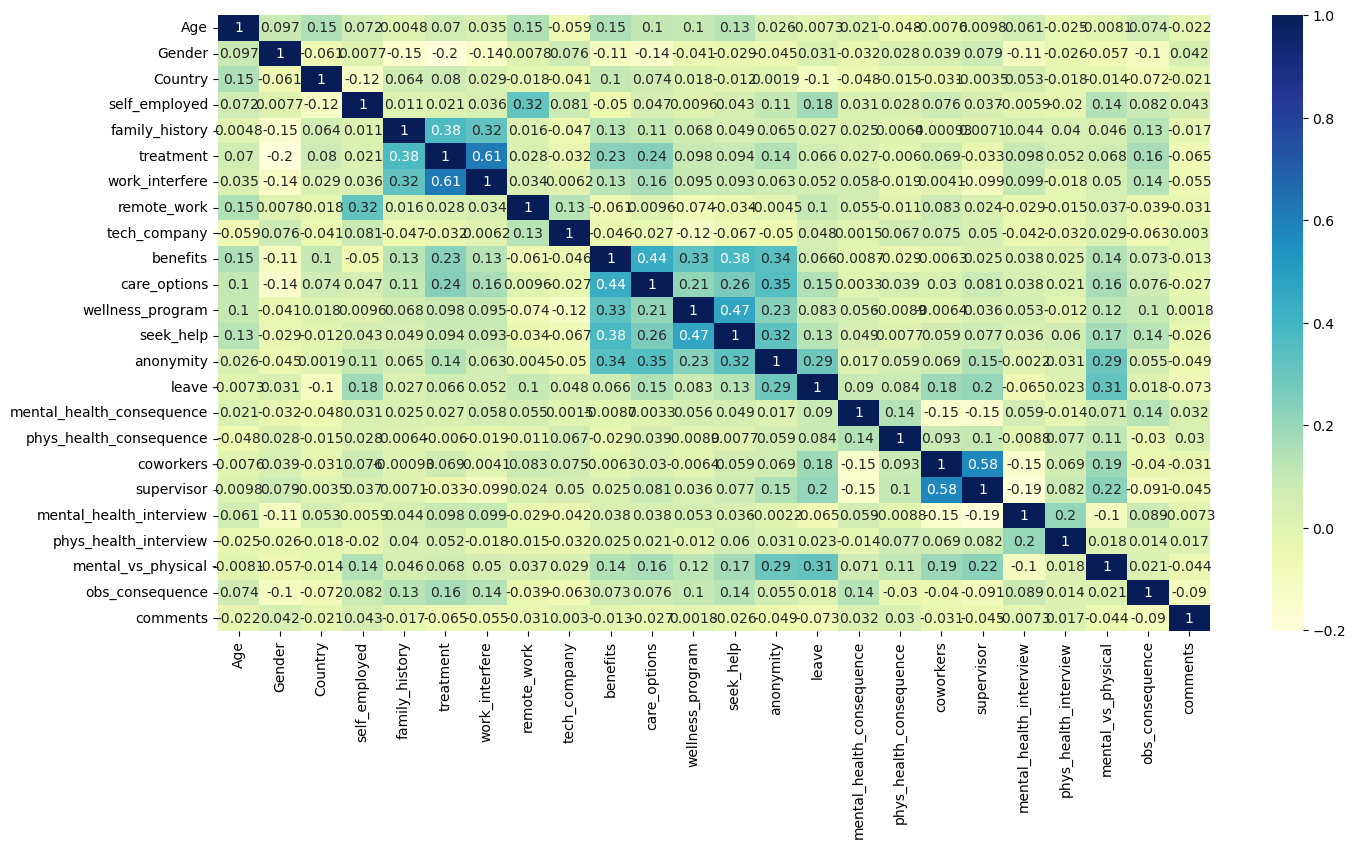

In [45]:
# Figure size
plt.figure(figsize=(16,8))

# Heatmap
sns.heatmap(correlation, cmap="YlGnBu", annot=True)
plt.show()

According to the heat map we see that the features that are maximum related to our lable treatment are as follow:

1.family_history
2.work_interference
3.benefits
4.care_options
5.anonymity
6.obs_consequences

In [46]:
#Scaling 
scaler = MinMaxScaler()
data['Age']= scaler.fit_transform(data[['Age']])
data['Country']=scaler.fit_transform(data[['Country']])
data.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,0.351852,1,0.957447,0,0,1,2,0,1,2,1,1,2,2,2,1,1,1,2,1,0,2,0,103
1,0.481481,2,0.957447,0,0,0,3,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,103
2,0.259259,2,0.148936,0,0,0,3,0,1,1,0,1,1,0,1,1,1,2,2,2,2,1,0,103
3,0.240741,2,0.936170,0,1,1,2,0,1,1,2,1,1,1,1,2,2,1,0,0,0,1,1,103
4,0.240741,2,0.957447,0,0,0,1,1,1,2,0,0,0,0,0,1,1,1,2,2,2,0,0,103


In [47]:
columns=['Age', 'Gender', 'Country', 'self_employed', 'family_history',
        'work_interfere', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments']
#Splitting dataset into x and Y
X = data[columns]
y = data.treatment

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7, test_size=0.3, random_state=0)

In [48]:
#Checking the feature importance
rf = RandomForestRegressor(random_state=0)

rf.fit(X_train,y_train)

RandomForestRegressor(random_state=0)

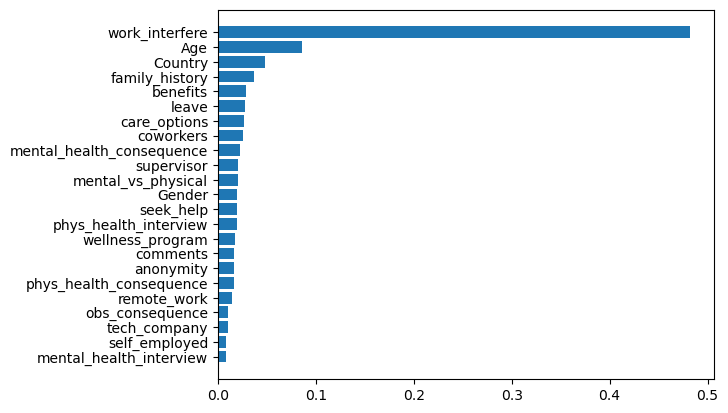

In [49]:
f_i = list(zip(columns,rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()

# Model Evaluation

## Logistic Regression

In [51]:
methodDict = {}

In [52]:
num_cv_splits = 3
skf = model_selection.StratifiedKFold(n_splits=num_cv_splits, shuffle=True, random_state=0)

C_val = 0.001 ; auc = 0.869676637778399 ; cv_num = 0
C_val = 0.01 ; auc = 0.8831422980150965 ; cv_num = 0
C_val = 0.1 ; auc = 0.8929736278072874 ; cv_num = 0
C_val = 1.0 ; auc = 0.8954431087503495 ; cv_num = 0
C_val = 10.0 ; auc = 0.895116950889945 ; cv_num = 0
C_val = 100.0 ; auc = 0.8950703569098872 ; cv_num = 0
C_val = 1000.0 ; auc = 0.8950237629298294 ; cv_num = 0
C_val = 0.001 ; auc = 0.8513792456370801 ; cv_num = 1
C_val = 0.01 ; auc = 0.8618408707074497 ; cv_num = 1
C_val = 0.1 ; auc = 0.8715518859072996 ; cv_num = 1
C_val = 1.0 ; auc = 0.8730061925314316 ; cv_num = 1
C_val = 10.0 ; auc = 0.871880277725652 ; cv_num = 1
C_val = 100.0 ; auc = 0.8722086695440046 ; cv_num = 1
C_val = 1000.0 ; auc = 0.8719271908425595 ; cv_num = 1
C_val = 0.001 ; auc = 0.8239350722462 ; cv_num = 2
C_val = 0.01 ; auc = 0.849831112779133 ; cv_num = 2
C_val = 0.1 ; auc = 0.8612310001876524 ; cv_num = 2
C_val = 1.0 ; auc = 0.8579470820041284 ; cv_num = 2
C_val = 10.0 ; auc = 0.8561643835616438 ; cv_num =

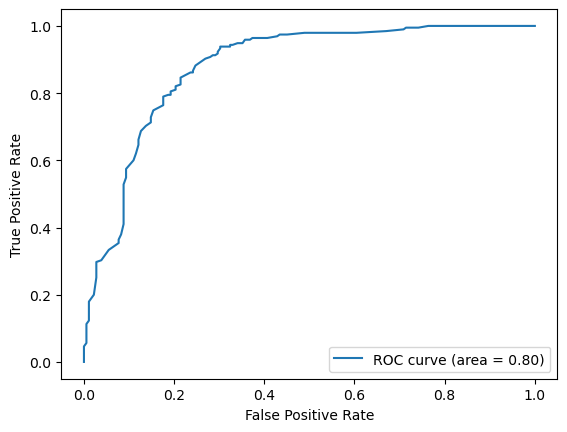



Results without Cross Validation:
 
AUC Score:
 0.7965201465201466
Training Accuracy:  0.8152793614595211
Test Accuracy: 0.7984084880636605
Precision: 0.7793427230046949
Recall: 0.8512820512820513


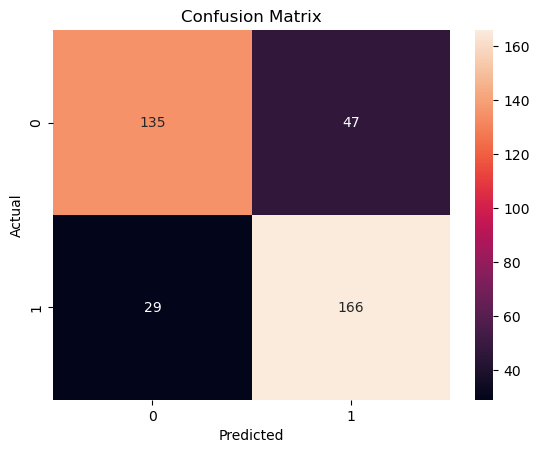

In [71]:

num_C = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
auc = np.zeros((len(num_C), num_cv_splits))
cv_num = 0
for train_index, test_index in skf.split(X_train, y_train):
    X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]
    for C_id, C_val in enumerate(num_C):
        lr = linear_model.LogisticRegression(C=C_val, random_state=0, solver='lbfgs', max_iter=1000, n_jobs=-1)
        lr.fit(X_train_cv, y_train_cv)
        auc[C_id, cv_num] = metrics.roc_auc_score(y_true = y_test_cv, y_score = lr.predict_proba(X_test_cv)[:,1])
        print('C_val =', C_val, '; auc =', auc[C_id, cv_num], '; cv_num =', cv_num)
    cv_num += 1
mean_auc = np.mean(auc, axis=1)
print('Best C:', num_C[np.argmax(mean_auc)])
print('Best auc corresponding to Best C:', mean_auc[np.argmax(mean_auc)])
print("\n")


print("Results with Cross Validation:\n ")
lr=linear_model.LogisticRegression(C=1.0, random_state=0, solver='lbfgs', max_iter=1000, n_jobs=-1)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
auc_log_CV=metrics.roc_auc_score(y_test, y_pred)
print('AUC Score:\n', auc_log_CV)
train_Acc=lr.score(X_train, y_train)    
print("Training Accuracy: ",train_Acc)
print('Test Accuracy:', metrics.accuracy_score(y_test, y_pred))
confusion = metrics.confusion_matrix(y_test, y_pred)
print('Precision:', metrics.precision_score(y_test, y_pred))
print('Recall:', metrics.recall_score(y_test, y_pred))
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(['ROC curve (area = %0.2f)' % auc_log_CV])
plt.show()


#Results without Cross Validation
print("\n")
print("Results without Cross Validation:\n ")
lr = LogisticRegression()
lr.fit(X_train, y_train)
    
# make class predictions for the testing set
y_pred = lr.predict(X_test)


# make class predictions for the testing set
y_pred = lr.predict(X_test)
print('AUC Score:\n', metrics.roc_auc_score(y_test, y_pred))
train_Acc=lr.score(X_train, y_train)    
print("Training Accuracy: ",train_Acc)
print('Test Accuracy:', metrics.accuracy_score(y_test, y_pred))
confusion = metrics.confusion_matrix(y_test, y_pred)
print('Precision:', metrics.precision_score(y_test, y_pred))
print('Recall:', metrics.recall_score(y_test, y_pred))


# visualize Confusion Matrix
sns.heatmap(confusion,annot=True,fmt="d") 
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

auc_log = metrics.roc_auc_score(y_test, y_pred)
y_pred_proba = lr.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)


#Best C: 1.0
#Best auc corresponding to Best C: 0.8797700935140185

#Data for final graph
methodDict['Log. Regres.'] = auc_log * 100
methodDict['CV Log Regres.'] = auc_log_CV * 100


### Decision Tree Classifier

depth = 2 ; min_samples_leaf = 30 ; min_samples_split = 2 ; auc = 0.884283850526512 ; cv_num = 0
depth = 2 ; min_samples_leaf = 30 ; min_samples_split = 31 ; auc = 0.884283850526512 ; cv_num = 0
depth = 2 ; min_samples_leaf = 50 ; min_samples_split = 2 ; auc = 0.884283850526512 ; cv_num = 0
depth = 2 ; min_samples_leaf = 50 ; min_samples_split = 31 ; auc = 0.884283850526512 ; cv_num = 0
depth = 2 ; min_samples_leaf = 100 ; min_samples_split = 2 ; auc = 0.8747320846146678 ; cv_num = 0
depth = 2 ; min_samples_leaf = 100 ; min_samples_split = 31 ; auc = 0.8747320846146678 ; cv_num = 0
depth = 3 ; min_samples_leaf = 30 ; min_samples_split = 2 ; auc = 0.8890597334824341 ; cv_num = 0
depth = 3 ; min_samples_leaf = 30 ; min_samples_split = 31 ; auc = 0.8890597334824341 ; cv_num = 0
depth = 3 ; min_samples_leaf = 50 ; min_samples_split = 2 ; auc = 0.8749417575249278 ; cv_num = 0
depth = 3 ; min_samples_leaf = 50 ; min_samples_split = 31 ; auc = 0.8749417575249278 ; cv_num = 0
depth = 3 ; min_s

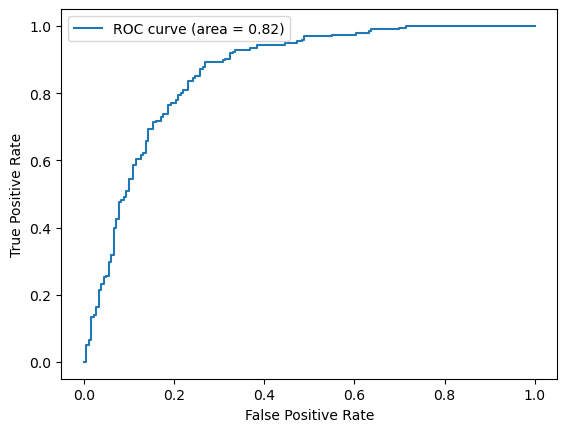



Results without Cross Validation: 
Training Accuracy:  0.8152793614595211
Test Accuracy: 0.8275862068965517
Precision: 0.773109243697479
AUC Score: 0.8234432234432234
Recall: 0.9435897435897436


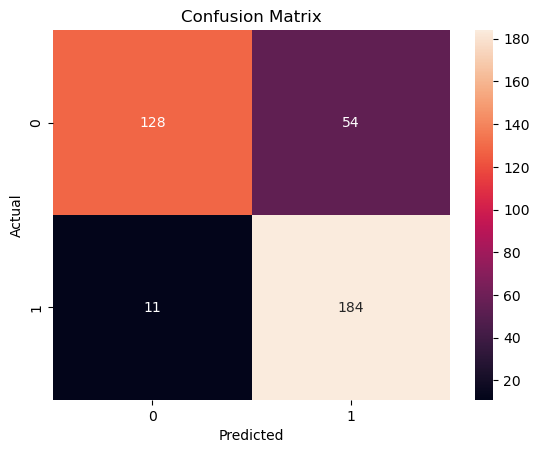

In [72]:
num_depth = range(2, 7)
num_min_samples_leaf = [30,50,100]
num_min_samples_split = [2,31]
auc = np.zeros((len(num_depth)*len(num_min_samples_leaf)*len(num_min_samples_split), num_cv_splits))
cv_num = 0
for train_index, test_index in skf.split(X_train, y_train):
    X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]
    for depth_id, depth in enumerate(num_depth):
        for min_samples_leaf_id, min_samples_leaf in enumerate(num_min_samples_leaf):
            for min_samples_split_id, min_samples_split in enumerate(num_min_samples_split):
                tree_ = DecisionTreeClassifier(criterion='entropy', max_depth=depth,
                        min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split, random_state=0)
                tree_.fit(X_train_cv, y_train_cv)
                auc_id = depth_id*len(num_min_samples_leaf)*len(num_min_samples_split)+\
                            min_samples_leaf_id*len(num_min_samples_split)+min_samples_split_id
                auc[auc_id, cv_num] = metrics.roc_auc_score(y_true = y_test_cv, y_score = tree_.predict_proba(X_test_cv)[:,1])
                print('depth =', depth, '; min_samples_leaf =', min_samples_leaf, '; min_samples_split =',
                      min_samples_split, '; auc =', auc[auc_id, cv_num], '; cv_num =', cv_num)
    cv_num += 1

depth_id = np.argmax(mean_auc)//(len(num_min_samples_leaf)*len(num_min_samples_split))
min_samples_leaf_id = (np.argmax(mean_auc) - depth_id*len(num_min_samples_leaf)*len(num_min_samples_split))//len(
                       num_min_samples_split)
min_samples_split_id = (np.argmax(mean_auc) - depth_id*len(num_min_samples_leaf)*len(num_min_samples_split))%len(
                       num_min_samples_split)
print('Best depth:', num_depth[depth_id])
print('Best min_samples_leaf:', num_min_samples_leaf[min_samples_leaf_id])
print('Best min_samples_split:', num_min_samples_leaf[min_samples_split_id])
print('Best auc corresponding to Best depth, min_samples_leaf & min_samples_split :', mean_auc[np.argmax(mean_auc)])

print("\n")
print("Results with Cross Validation: ")

tree_ = DecisionTreeClassifier(criterion='entropy', max_depth=3,
                        min_samples_leaf=50, min_samples_split=30, random_state=0)
tree_.fit(X_train, y_train)
y_pred = tree_.predict(X_test)
auc_CV_DT=metrics.roc_auc_score(y_test, y_pred)
print('AUC Score:\n', auc_CV_DT)
train_Acc=lr.score(X_train, y_train)    
print("Training Accuracy: ",train_Acc)
print('Test Accuracy:', metrics.accuracy_score(y_test, y_pred))
confusion = metrics.confusion_matrix(y_test, y_pred)
print('Precision:', metrics.precision_score(y_test, y_pred))
print('Recall:', metrics.recall_score(y_test, y_pred))
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(['ROC curve (area = %0.2f)' % auc_CV_DT])
plt.show()


print("\n")
print("Results without Cross Validation: ")

# make class predictions for the testing 
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)
train_Acc=lr.score(X_train, y_train) 
print("Training Accuracy: ",train_Acc)
print('Test Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Precision:', metrics.precision_score(y_test, y_pred))
print('AUC Score:', metrics.roc_auc_score(y_test, y_pred))
print('Recall:', metrics.recall_score(y_test, y_pred))
confusion = metrics.confusion_matrix(y_test, y_pred)

    
    # visualize Confusion Matrix
sns.heatmap(confusion,annot=True,fmt="d") 
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

roc_auc = metrics.roc_auc_score(y_test, y_pred)
y_pred_proba = tree.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)


#Data for final graph
methodDict['DT.'] = roc_auc * 100
methodDict['CV DT.'] = auc_CV_DT * 100

### Random Forest Classifier

num_trees = 801 ; auc = 0.9085826111266424 ; cv_num = 0
num_trees = 801 ; auc = 0.9001219741039594 ; cv_num = 1
num_trees = 801 ; auc = 0.8851097766935635 ; cv_num = 2
Best num_trees: 801
Best auc corresponding to Best num_trees : 0.8979381206413884


Results with Cross Validation: 
AUC Score:
 0.8141025641025641
Training Accuracy:  0.8472063854047891
Test Accuracy: 0.8169761273209549
Precision: 0.78125
Recall: 0.8974358974358975


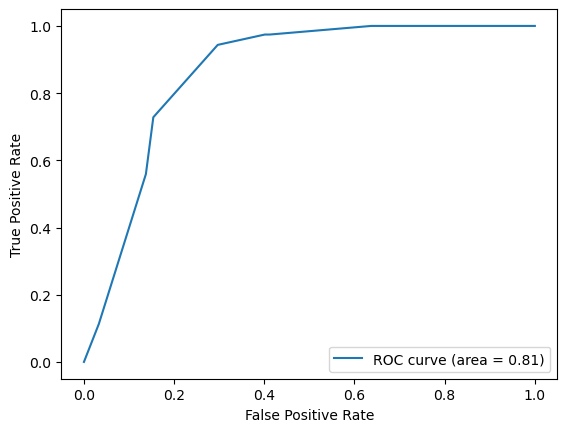



Results without Cross Validation: 
Accuracy: 0.8275862068965517
Precision: 0.8125
AUC Score: 0.8261904761904761
Recall: 0.8666666666666667


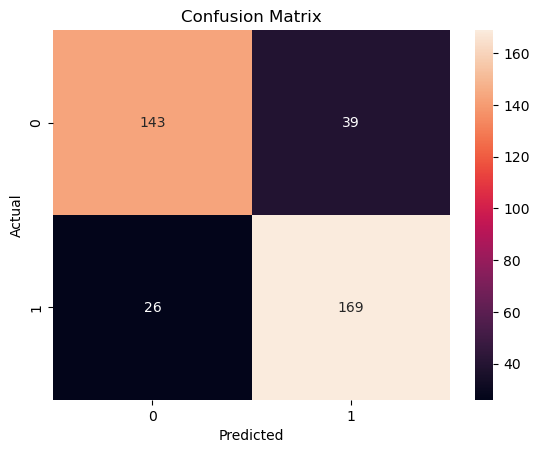

In [74]:
initial_trees = 801
num_trees = 899
tree_increment = 100
trees = range(initial_trees, num_trees+1, tree_increment)
auc = np.zeros((len(trees), num_cv_splits))
cv_num = 0
for train_index, test_index in skf.split(X_train, y_train):
    X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]
    random = ensemble.RandomForestClassifier(criterion='entropy', min_samples_leaf=30, warm_start=True, n_jobs=-1,
                                          random_state=0)
    for tree_id, tree in enumerate(trees):
        random.set_params(n_estimators=tree)
        random.fit(X_train_cv, y_train_cv)
        auc[tree_id, cv_num] = metrics.roc_auc_score(y_true = y_test_cv, y_score = random.predict_proba(X_test_cv)[:,1])
        print('num_trees =', tree, '; auc =', auc[tree_id, cv_num], '; cv_num =', cv_num)
    cv_num += 1
mean_auc = np.mean(auc, axis=1)
print('Best num_trees:', trees[np.argmax(mean_auc)])
print('Best auc corresponding to Best num_trees :', mean_auc[np.argmax(mean_auc)])


print("\n")
print("Results with Cross Validation: ")
random = ensemble.RandomForestClassifier(criterion='entropy', min_samples_leaf=30, warm_start=True, n_jobs=-1,
                                          random_state=0,n_estimators=898)
random.fit(X_train, y_train)
y_pred = random.predict(X_test)

auc_CV_RF=metrics.roc_auc_score(y_test, y_pred)
print('AUC Score:\n', auc_CV_RF)
train_Acc=random.score(X_train, y_train)    
print("Training Accuracy: ",train_Acc)
print('Test Accuracy:', metrics.accuracy_score(y_test, y_pred))
confusion = metrics.confusion_matrix(y_test, y_pred)
print('Precision:', metrics.precision_score(y_test, y_pred))
print('Recall:', metrics.recall_score(y_test, y_pred))
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(['ROC curve (area = %0.2f)' % auc_CV_RF])
plt.show()


print("\n")
print("Results without Cross Validation: ")
    
  
    
random = RandomForestClassifier()
random.fit(X_train,y_train)
    # make class predictions for the testing set
y_pred = random.predict(X_test)
mean_auc= metrics.roc_auc_score(y_test, y_pred)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Precision:', metrics.precision_score(y_test, y_pred))
print('AUC Score:', metrics.roc_auc_score(y_test, y_pred))
print('Recall:', metrics.recall_score(y_test, y_pred))
confusion = metrics.confusion_matrix(y_test, y_pred)

    
    # visualize Confusion Matrix
sns.heatmap(confusion,annot=True,fmt="d") 
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

auc_RF = metrics.roc_auc_score(y_test, y_pred)
y_pred_proba = random.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)


#Data for final graph
methodDict['R. Forest'] = auc_RF * 100
methodDict['CV R. Forest'] = auc_CV_RF * 100

### Adaboost Classifier

Accuracy: 0.7904509283819628
Precision: 0.7843137254901961
Recall: 0.8205128205128205
AUC Score: 0.7893772893772893


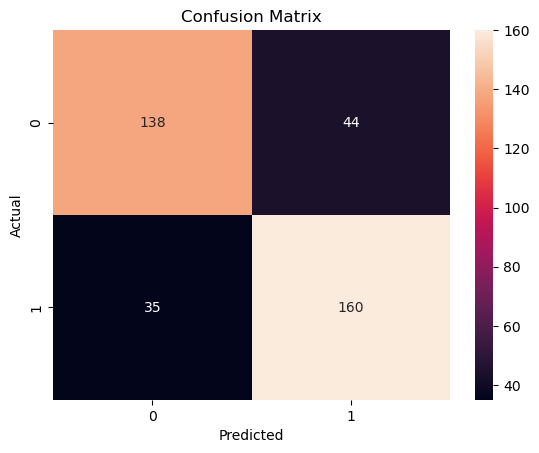

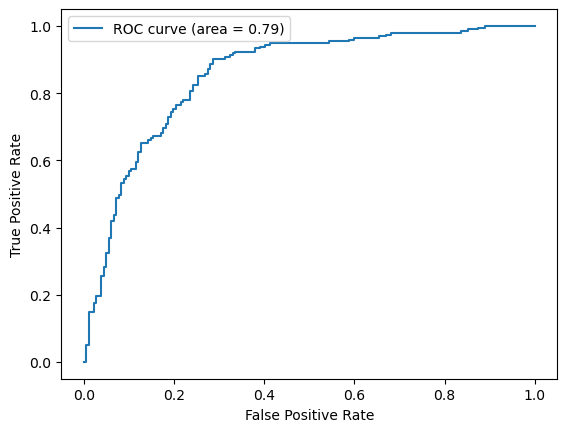

In [77]:
# Adaboost with the tree as base estimator
# base estimator with max depth=3 from our above cross validation results
tree = DecisionTreeClassifier(max_depth=3)

adaboost_model = AdaBoostClassifier(
    base_estimator=tree,
    n_estimators=600,
    learning_rate=0.5,
    algorithm="SAMME")
adaboost_model.fit(X_train,y_train)
y_pred = adaboost_model.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Precision:', metrics.precision_score(y_test, y_pred))
print('Recall:', metrics.recall_score(y_test, y_pred))
print('AUC Score:', metrics.roc_auc_score(y_test, y_pred))
confusion = metrics.confusion_matrix(y_test, y_pred)

    
    # visualize Confusion Matrix
sns.heatmap(confusion,annot=True,fmt="d") 
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

auc_AB = metrics.roc_auc_score(y_test, y_pred)
y_pred_proba = adaboost_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(['ROC curve (area = %0.2f)' % auc_AB])
plt.show()


#Data for final graph
methodDict['Adaboost'] = auc_AB * 100

### Gradient Boosting

Accuracy: 0.830238726790451
Precision: 0.8075117370892019
Recall: 0.882051282051282
AUC Score: 0.8283882783882783


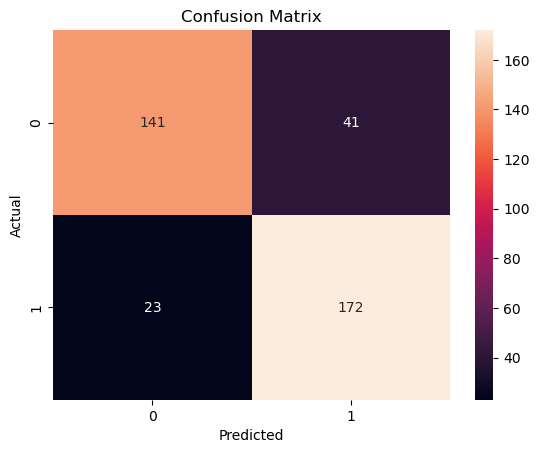

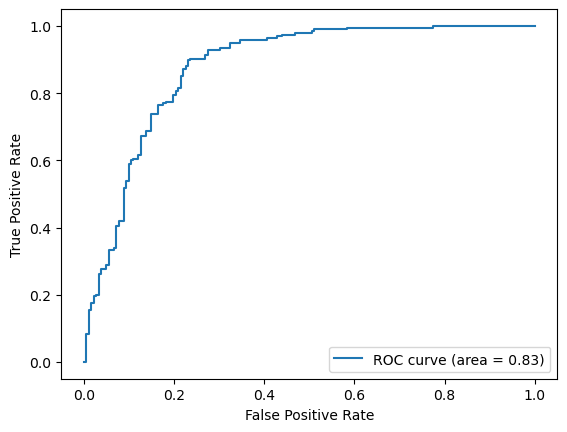

In [78]:
# Gradient Boosting with the tree as base estimator
gradient_model = GradientBoostingClassifier(max_depth=2, n_estimators=200)
gradient_model.fit(X_train,y_train)
y_pred = gradient_model.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Precision:', metrics.precision_score(y_test, y_pred))
print('Recall:', metrics.recall_score(y_test, y_pred))
print('AUC Score:', metrics.roc_auc_score(y_test, y_pred))
confusion = metrics.confusion_matrix(y_test, y_pred)

    
    # visualize Confusion Matrix
sns.heatmap(confusion,annot=True,fmt="d") 
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

auc_GB = metrics.roc_auc_score(y_test, y_pred)
y_pred_proba = gradient_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(['ROC curve (area = %0.2f)' % auc_GB])
plt.show()


#Data for final graph
methodDict['Gradient Boosting'] = auc_GB * 100

### KNN Classifier

Neighbour = 1 ; auc = 0.6827182927965707 ; cv_num = 0
Neighbour = 3 ; auc = 0.7894418041189077 ; cv_num = 0
Neighbour = 5 ; auc = 0.8144860683999627 ; cv_num = 0
Neighbour = 7 ; auc = 0.8280449165967757 ; cv_num = 0
Neighbour = 9 ; auc = 0.8428385052651197 ; cv_num = 0
Neighbour = 11 ; auc = 0.8464495387195974 ; cv_num = 0
Neighbour = 13 ; auc = 0.8387382350200354 ; cv_num = 0
Neighbour = 15 ; auc = 0.8387848290000932 ; cv_num = 0
Neighbour = 17 ; auc = 0.8363619420370889 ; cv_num = 0
Neighbour = 19 ; auc = 0.8365017239772621 ; cv_num = 0
Neighbour = 21 ; auc = 0.8376665734787065 ; cv_num = 0
Neighbour = 23 ; auc = 0.8383188891995155 ; cv_num = 0
Neighbour = 25 ; auc = 0.8389479079302954 ; cv_num = 0
Neighbour = 27 ; auc = 0.843001584195322 ; cv_num = 0
Neighbour = 29 ; auc = 0.8477774671512439 ; cv_num = 0
Neighbour = 31 ; auc = 0.8478706551113596 ; cv_num = 0
Neighbour = 1 ; auc = 0.6849315068493151 ; cv_num = 1
Neighbour = 3 ; auc = 0.8014636892475135 ; cv_num = 1
Neighbour = 5 ; au

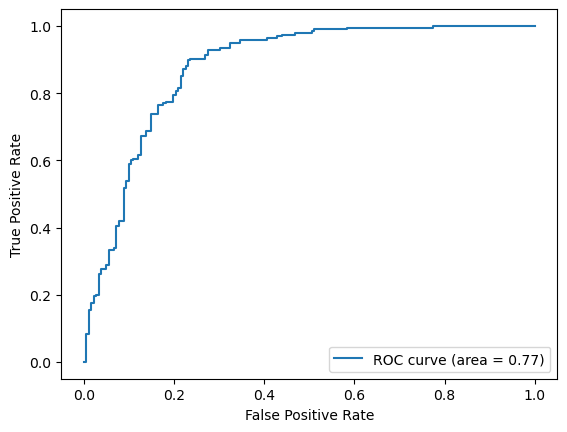



Results without Cross Validation: 
Accuracy: 0.7824933687002652
Precision: 0.7511111111111111
Recall: 0.8666666666666667
AUC Score: 0.7794871794871795


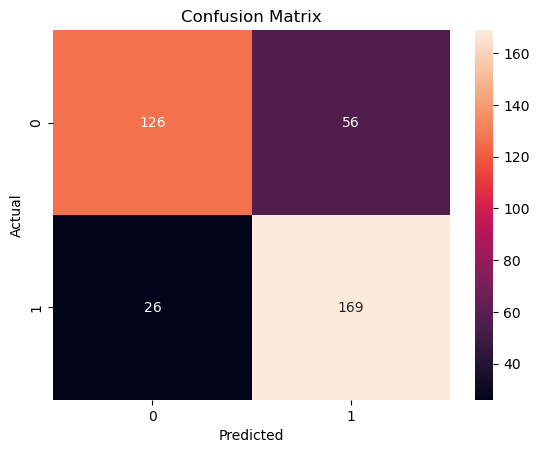

In [79]:
from sklearn import neighbors

# num_neighbours = int(np.sum(y_train)*(num_cv_splits-1)/num_cv_splits) #Ideally, why?
num_neighbours = 31 #Why? Hint: Central Limit Theorem
auc = np.zeros((len(range(1, num_neighbours+1, 2)), num_cv_splits)) # Why increment of 2? Hint: Breaking Ties
cv_num = 0
for train_index, test_index in skf.split(X_train, y_train):
    X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]
    for kid, k in enumerate(range(1, num_neighbours+1, 2)):
        knn = neighbors.KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
        knn.fit(X_train_cv, y_train_cv)
        auc[kid, cv_num] = metrics.roc_auc_score(y_true = y_test_cv, y_score = knn.predict_proba(X_test_cv)[:,1])
        print('Neighbour =', k, '; auc =', auc[kid, cv_num], '; cv_num =', cv_num)
    cv_num += 1
mean_auc = np.mean(auc, axis=1)
print('Best neighbour k:', 2*np.argmax(mean_auc)+1)
print('Best auc corresponding to Best neighbour:', mean_auc[np.argmax(mean_auc)])



print("\n")
print("Results with Cross Validation: ")
knn = neighbors.KNeighborsClassifier(n_neighbors=29, n_jobs=-1)
knn.fit(X_train_cv, y_train_cv)
y_pred = knn.predict(X_test)
print('AUC Score:\n', metrics.roc_auc_score(y_test, y_pred))
auc_CV_KNN=metrics.roc_auc_score(y_test, y_pred)
train_Acc=knn.score(X_train, y_train)    
print("Training Accuracy: ",train_Acc)
print('Test Accuracy:', metrics.accuracy_score(y_test, y_pred))
confusion = metrics.confusion_matrix(y_test, y_pred)
print('Precision:', metrics.precision_score(y_test, y_pred))
print('Recall:', metrics.recall_score(y_test, y_pred))

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(['ROC curve (area = %0.2f)' % auc_CV_KNN])
plt.show()

print("\n")
print("Results without Cross Validation: ")

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Precision:', metrics.precision_score(y_test, y_pred))
print('Recall:', metrics.recall_score(y_test, y_pred))
print('AUC Score:', metrics.roc_auc_score(y_test, y_pred))
confusion = metrics.confusion_matrix(y_test, y_pred)

    
    # visualize Confusion Matrix
sns.heatmap(confusion,annot=True,fmt="d") 
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

auc_KNN = metrics.roc_auc_score(y_test, y_pred)
y_pred_proba = knn.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)



methodDict['KNN'] = auc_KNN * 100
methodDict['CV KNN'] = auc_CV_KNN * 100

### SVM Classifier

[LibSVM]C_val = 0.001 ; auc = 0.8739632839437145 ; cv_num = 0
[LibSVM]C_val = 0.01 ; auc = 0.8824899822942877 ; cv_num = 0
[LibSVM]C_val = 0.1 ; auc = 0.8878016960208741 ; cv_num = 0
[LibSVM]C_val = 1.0 ; auc = 0.8908303047246295 ; cv_num = 0
[LibSVM]C_val = 10.0 ; auc = 0.8906905227844562 ; cv_num = 0
[LibSVM]C_val = 50.0 ; auc = 0.8897353461932718 ; cv_num = 0
[LibSVM]C_val = 100.0 ; auc = 0.8949771689497716 ; cv_num = 0
[LibSVM]C_val = 1000.0 ; auc = 0.8742428478240611 ; cv_num = 0
[LibSVM]C_val = 0.001 ; auc = 0.8549915556389567 ; cv_num = 1
[LibSVM]C_val = 0.01 ; auc = 0.8662507036967536 ; cv_num = 1
[LibSVM]C_val = 0.1 ; auc = 0.8735691499343217 ; cv_num = 1
[LibSVM]C_val = 1.0 ; auc = 0.8755395008444361 ; cv_num = 1
[LibSVM]C_val = 10.0 ; auc = 0.8739209983111278 ; cv_num = 1
[LibSVM]C_val = 50.0 ; auc = 0.8753049352598987 ; cv_num = 1
[LibSVM]C_val = 100.0 ; auc = 0.8753987614937137 ; cv_num = 1
[LibSVM]C_val = 1000.0 ; auc = 0.8767826984424845 ; cv_num = 1
[LibSVM]C_val = 0.00

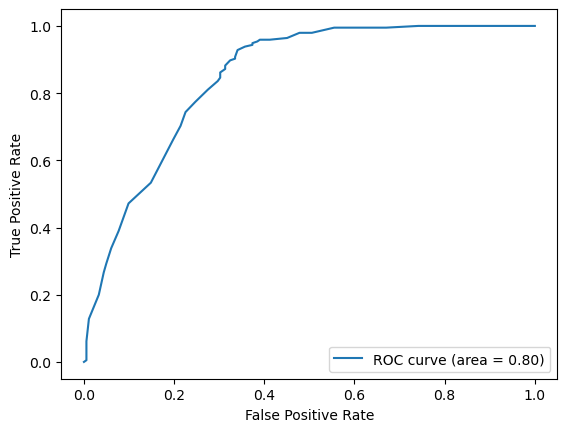

Results without Cross Validation: 
Accuracy: 0.8010610079575596
Precision: 0.7727272727272727
Recall: 0.8717948717948718
AUC Score: 0.7985347985347985


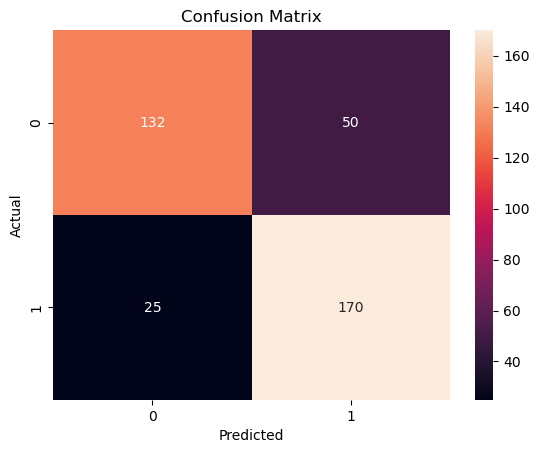

In [80]:
# sklearn.svm.SVC is impractical beyond tens of thousands of samples! Qudratic compute!
from sklearn import svm

num_C = [0.001, 0.01, 0.1, 1.0, 10.0,50.0, 100.0, 1000.0]

auc = np.zeros((len(num_C), num_cv_splits))
cv_num = 0
for train_index, test_index in skf.split(X_train, y_train):
    X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]
    for C_id, C_val in enumerate(num_C):
        sv = svm.SVC(C=C_val, kernel='linear', gamma='scale', probability=True, cache_size=200, verbose=True,
                      random_state=0) # probability=True necessary for predict_proba
        sv.fit(X_train_cv, y_train_cv)
        auc[C_id, cv_num] = metrics.roc_auc_score(y_true = y_test_cv, y_score = sv.predict_proba(X_test_cv)[:,1])
        print('C_val =', C_val, '; auc =', auc[C_id, cv_num], '; cv_num =', cv_num)
    cv_num += 1
mean_auc = np.mean(auc, axis=1)
print('Best C:', num_C[np.argmax(mean_auc)])
print('Best auc corresponding to Best C:', mean_auc[np.argmax(mean_auc)])
print("\n")



print("\n")
print("Results with Cross Validation: ")
sv = svm.SVC(C=1.0, kernel='linear', gamma='scale', probability=True, cache_size=200, verbose=True,
                      random_state=0) # probability=True necessary for predict_proba
sv.fit(X_train_cv, y_train_cv)
y_pred = sv.predict(X_test)
print('AUC Score:\n', metrics.roc_auc_score(y_test, y_pred))
auc_sv=metrics.roc_auc_score(y_test, y_pred)
train_Acc=sv.score(X_train, y_train)    
print("Training Accuracy: ",train_Acc)
print('Test Accuracy:', metrics.accuracy_score(y_test, y_pred))
confusion = metrics.confusion_matrix(y_test, y_pred)
print('Precision:', metrics.precision_score(y_test, y_pred))
print('Recall:', metrics.recall_score(y_test, y_pred))
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(['ROC curve (area = %0.2f)' % auc_sv])
plt.show()


print("Results without Cross Validation: ")


#Create a svm Classifier
SVM = svm.SVC(kernel='linear', probability=True) # Linear Kernel
SVM.fit(X_train, y_train)
y_pred = SVM.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Precision:', metrics.precision_score(y_test, y_pred))
print('Recall:', metrics.recall_score(y_test, y_pred))
print('AUC Score:', metrics.roc_auc_score(y_test, y_pred))
confusion = metrics.confusion_matrix(y_test, y_pred)

    
    # visualize Confusion Matrix
sns.heatmap(confusion,annot=True,fmt="d") 
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

auc = metrics.roc_auc_score(y_test, y_pred)
y_pred_proba = SVM.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)



methodDict['SVM'] = auc * 100
methodDict['CV SVM'] = auc_sv * 100

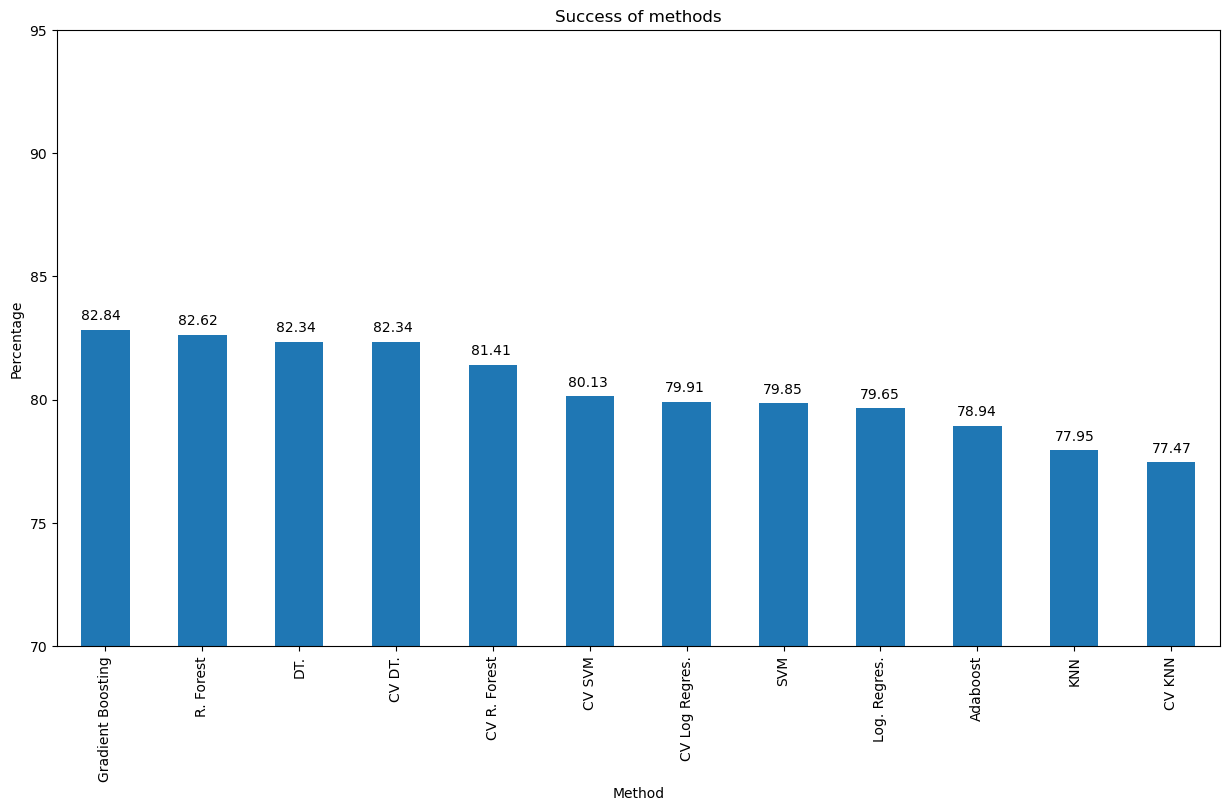

In [81]:
s = pd.Series(methodDict)
s = s.sort_values(ascending=False)
plt.figure(figsize=(15,8))
#Colors
ax = s.plot(kind='bar') 
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.ylim([70.0, 95.0])
plt.xlabel('Method')
plt.ylabel('Percentage')
plt.title('Success of methods')
     
plt.show()

## Model Evaluation Using feature selection

In [82]:
# Building model using first 15 features
No_of_features=15
rfe_logistic1 = RFE(lr,n_features_to_select=No_of_features)
rfe_tree1 = RFE(tree_, n_features_to_select=No_of_features)
rfe_random1 = RFE(random, n_features_to_select=No_of_features)
rfe_adaboost1 = RFE(adaboost_model, n_features_to_select=No_of_features)
rfe_gradient1 = RFE(gradient_model, n_features_to_select=No_of_features)
#rfe_knn1 = RFE(knn, n_features_to_select=No_of_features)
rfe_SVM1 = RFE(sv, n_features_to_select=No_of_features)

# Fit with 15 features
rfe_logistic1.fit(X_train, y_train)
rfe_tree1.fit(X_train, y_train)
rfe_random1.fit(X_train, y_train)
rfe_adaboost1.fit(X_train, y_train)
rfe_gradient1.fit(X_train, y_train)
#rfe_knn1.fit(X_train, y_train) RFE doesn't work for KNN algorithm
rfe_SVM1.fit(X_train, y_train)


methodDict1 = {}

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

### Models Evaluation using 15 Features of RFE

#### Logistic Regression

Accuracy: 0.8037135278514589
Precision: 0.7788018433179723
Recall: 0.8666666666666667
AUC Score: 0.8014652014652015


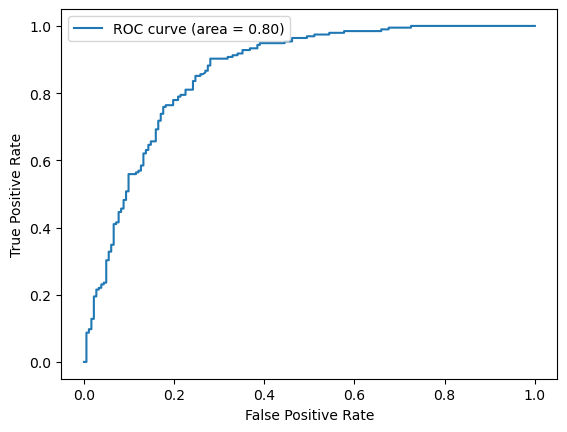

In [84]:
y_pred = rfe_logistic1.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Precision:', metrics.precision_score(y_test, y_pred))
print('Recall:', metrics.recall_score(y_test, y_pred))
print('AUC Score:', metrics.roc_auc_score(y_test, y_pred))
confusion = metrics.confusion_matrix(y_test, y_pred)

auc_log1 = metrics.roc_auc_score(y_test, y_pred)
y_pred_proba = SVM.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(['ROC curve (area = %0.2f)' % auc_log1])
plt.show()

methodDict1['Log Reg'] = auc_log1 * 100

#### Decision Tree

Accuracy: 0.8275862068965517
Precision: 0.773109243697479
Recall: 0.9435897435897436
AUC Score: 0.8234432234432234


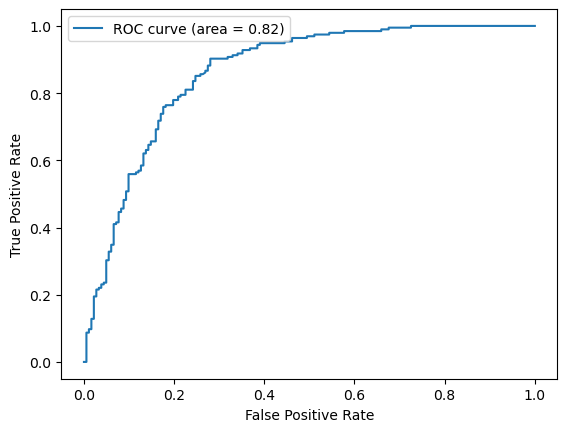

In [85]:
y_pred = rfe_tree1.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Precision:', metrics.precision_score(y_test, y_pred))
print('Recall:', metrics.recall_score(y_test, y_pred))
print('AUC Score:', metrics.roc_auc_score(y_test, y_pred))
confusion = metrics.confusion_matrix(y_test, y_pred)

auc_DT1 = metrics.roc_auc_score(y_test, y_pred)
y_pred_proba = SVM.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(['ROC curve (area = %0.2f)' % auc_DT1])
plt.show()
methodDict1['Decision Tree'] = auc_DT1 * 100

#### Random Forest

Accuracy: 0.8143236074270557
Precision: 0.7906976744186046
Recall: 0.8717948717948718
AUC Score: 0.8122710622710623


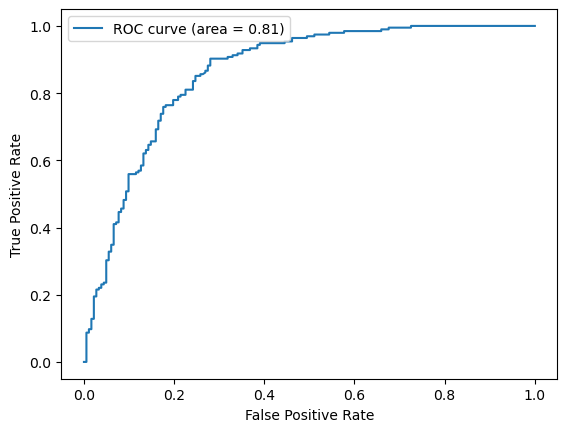

In [86]:
y_pred = rfe_random1.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Precision:', metrics.precision_score(y_test, y_pred))
print('Recall:', metrics.recall_score(y_test, y_pred))
print('AUC Score:', metrics.roc_auc_score(y_test, y_pred))
confusion = metrics.confusion_matrix(y_test, y_pred)

auc_RF1 = metrics.roc_auc_score(y_test, y_pred)
y_pred_proba = SVM.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(['ROC curve (area = %0.2f)' % auc_RF1])
plt.show()
methodDict1['Random Forest'] = auc_RF1 * 100

#### Adaboost Classifier

Accuracy: 0.8222811671087533
Precision: 0.8106796116504854
Recall: 0.8564102564102564
AUC Score: 0.821062271062271


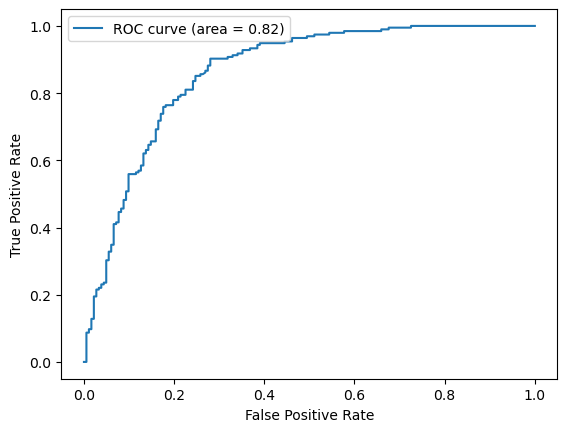

In [87]:
y_pred = rfe_adaboost1.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Precision:', metrics.precision_score(y_test, y_pred))
print('Recall:', metrics.recall_score(y_test, y_pred))
print('AUC Score:', metrics.roc_auc_score(y_test, y_pred))
confusion = metrics.confusion_matrix(y_test, y_pred)

auc_AB1 = metrics.roc_auc_score(y_test, y_pred)
y_pred_proba = SVM.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(['ROC curve (area = %0.2f)' % auc_AB1])
plt.show()
methodDict1['Adaboost'] = auc_AB1 * 100

#### Gradient Boosting

Accuracy: 0.8090185676392573
Precision: 0.786046511627907
Recall: 0.8666666666666667
AUC Score: 0.806959706959707


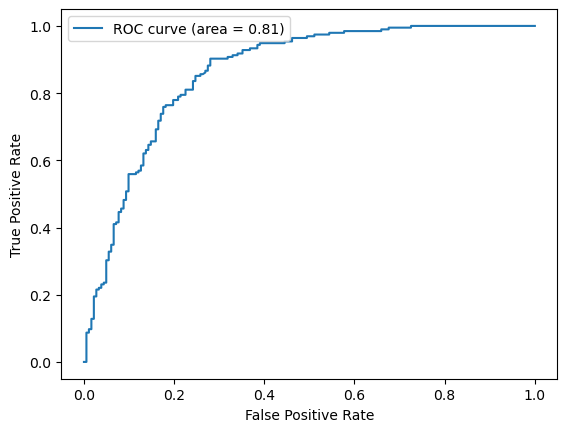

In [92]:
y_pred = rfe_gradient1.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Precision:', metrics.precision_score(y_test, y_pred))
print('Recall:', metrics.recall_score(y_test, y_pred))
print('AUC Score:', metrics.roc_auc_score(y_test, y_pred))
confusion = metrics.confusion_matrix(y_test, y_pred)

auc_GB1 = metrics.roc_auc_score(y_test, y_pred)
y_pred_proba = SVM.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(['ROC curve (area = %0.2f)' % auc_GB1])
plt.show()
methodDict1['Gradient Boosting'] = auc_GB1 * 100

#### SVM

Accuracy: 0.8169761273209549
Precision: 0.7837837837837838
Recall: 0.8923076923076924
AUC Score: 0.8142857142857143


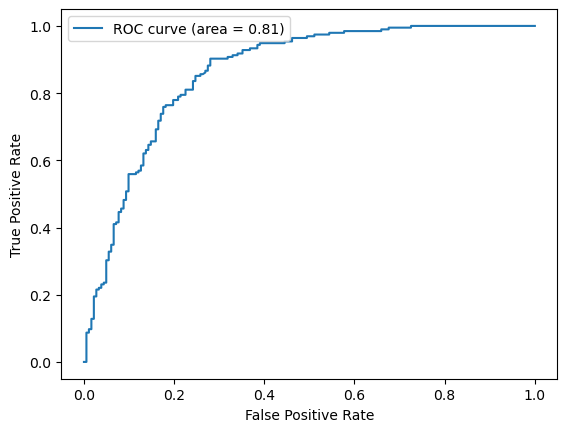

In [93]:
y_pred = rfe_SVM1.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Precision:', metrics.precision_score(y_test, y_pred))
print('Recall:', metrics.recall_score(y_test, y_pred))
print('AUC Score:', metrics.roc_auc_score(y_test, y_pred))
confusion = metrics.confusion_matrix(y_test, y_pred)

auc_sv1 = metrics.roc_auc_score(y_test, y_pred)
y_pred_proba = SVM.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(['ROC curve (area = %0.2f)' % auc_sv1])
plt.show()
methodDict1['SVM'] = auc_sv1 * 100

In [94]:
# Subset the features selected by rfe1
col1 = X_train.columns[rfe_logistic1.support_]

# Subsetting training data for 15 selected columns
X_train_rfe1 = X_train[col1]
data_vif = pd.DataFrame()
data_vif['Features'] = X_train_rfe1.columns
data_vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
data_vif['VIF'] = round(data_vif['VIF'], 2)
data_vif = data_vif.sort_values(by = "VIF", ascending = False)
data_vif

,Features,VIF
1,Gender,10.61
2,Country,7.75
5,tech_company,5.27
12,mental_health_interview,5.24
0,Age,4.95
10,phys_health_consequence,4.01
6,benefits,3.82
8,seek_help,3.74
11,coworkers,3.54
4,work_interfere,3.49


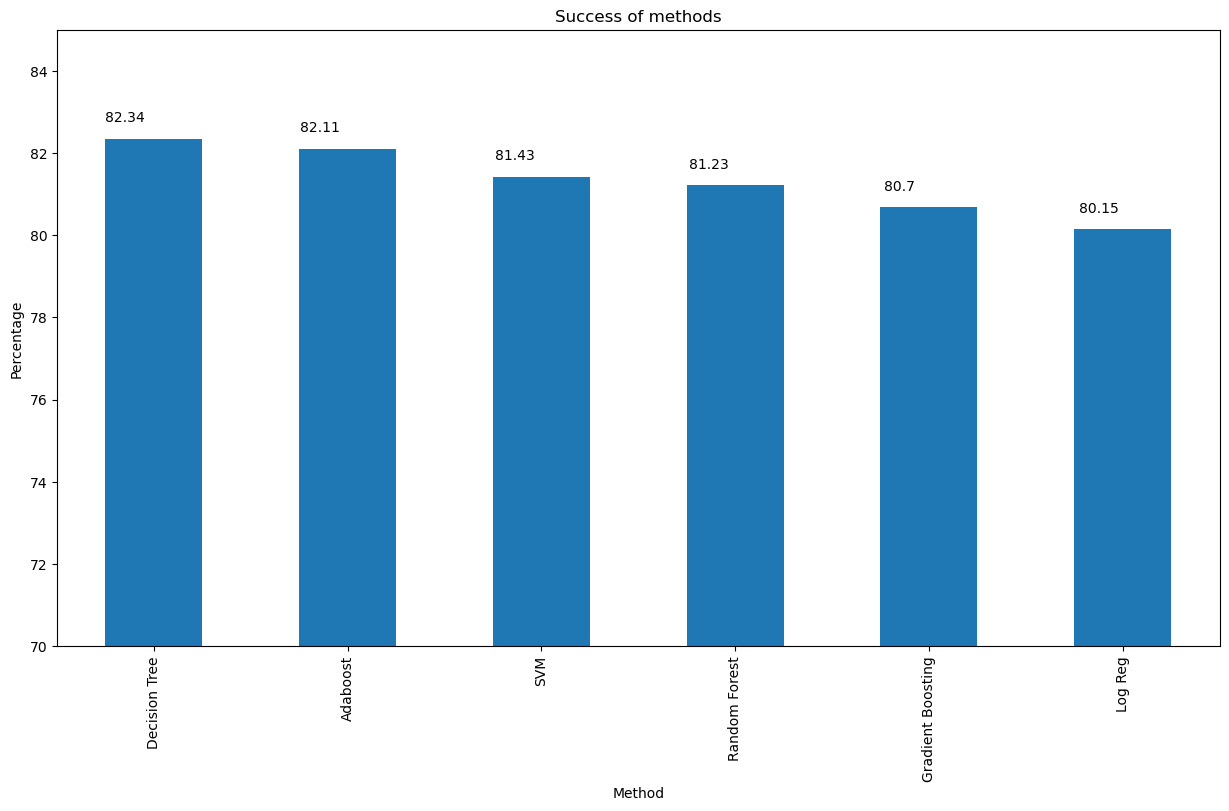

In [95]:
s = pd.Series(methodDict1)
s = s.sort_values(ascending=False)
plt.figure(figsize=(15,8))
#Colors
ax = s.plot(kind='bar') 
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.ylim([70.0, 85.0])
plt.xlabel('Method')
plt.ylabel('Percentage')
plt.title('Success of methods')
     
plt.show()

In [96]:
# Building model using first 10 features with maximum vif value
No_of_features=10
rfe_logistic2 = RFE(lr,n_features_to_select=No_of_features)
rfe_tree2 = RFE(tree_, n_features_to_select=No_of_features)
rfe_random2 = RFE(random, n_features_to_select=No_of_features)
rfe_adaboost2 = RFE(adaboost_model, n_features_to_select=No_of_features)
rfe_gradient2 = RFE(gradient_model, n_features_to_select=No_of_features)
rfe_knn2 = RFE(knn, n_features_to_select=No_of_features)
rfe_SVM2 = RFE(sv, n_features_to_select=No_of_features)

# Fit with 10 features
rfe_logistic2.fit(X_train, y_train)
rfe_tree2.fit(X_train, y_train)
rfe_random2.fit(X_train, y_train)
rfe_adaboost2.fit(X_train, y_train)
rfe_gradient2.fit(X_train, y_train)

#rfe_knn1.fit(X_train, y_train) RFE doesn't work for KNN algorithm
rfe_SVM2.fit(X_train, y_train)

methodDict2 = {}

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

### Models Evaluation using 10 Features of RFE


Accuracy: 0.8063660477453581
Precision: 0.7824074074074074
Recall: 0.8666666666666667
AUC Score: 0.8042124542124542


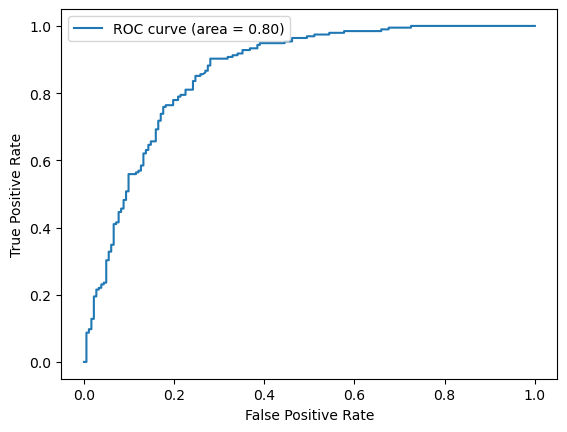

In [97]:
y_pred = rfe_logistic2.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Precision:', metrics.precision_score(y_test, y_pred))
print('Recall:', metrics.recall_score(y_test, y_pred))
print('AUC Score:', metrics.roc_auc_score(y_test, y_pred))
confusion = metrics.confusion_matrix(y_test, y_pred)

auc_log2 = metrics.roc_auc_score(y_test, y_pred)
y_pred_proba = SVM.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(['ROC curve (area = %0.2f)' % auc_log2])
plt.show()
methodDict2['Log Reg'] = auc_log2 * 100


Accuracy: 0.8275862068965517
Precision: 0.773109243697479
Recall: 0.9435897435897436
AUC Score: 0.8234432234432234


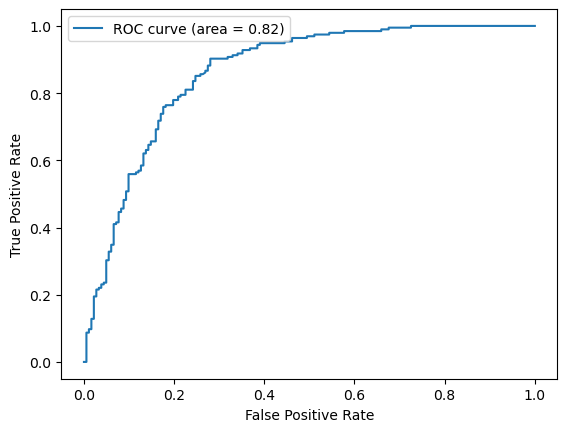

In [98]:
y_pred = rfe_tree2.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Precision:', metrics.precision_score(y_test, y_pred))
print('Recall:', metrics.recall_score(y_test, y_pred))
print('AUC Score:', metrics.roc_auc_score(y_test, y_pred))
confusion = metrics.confusion_matrix(y_test, y_pred)

auc_DT2 = metrics.roc_auc_score(y_test, y_pred)
y_pred_proba = SVM.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(['ROC curve (area = %0.2f)' % auc_DT2])
plt.show()
methodDict2['Decision Tree'] = auc_DT2 * 100

Accuracy: 0.8328912466843501
Precision: 0.8173076923076923
Recall: 0.8717948717948718
AUC Score: 0.8315018315018315


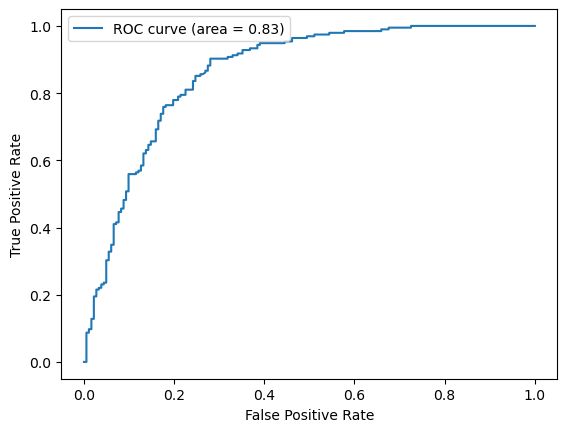

In [99]:
y_pred = rfe_random2.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Precision:', metrics.precision_score(y_test, y_pred))
print('Recall:', metrics.recall_score(y_test, y_pred))
print('AUC Score:', metrics.roc_auc_score(y_test, y_pred))
confusion = metrics.confusion_matrix(y_test, y_pred)

auc_RF2 = metrics.roc_auc_score(y_test, y_pred)
y_pred_proba = SVM.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(['ROC curve (area = %0.2f)' % auc_RF2])
plt.show()
methodDict2['Random Forest'] = auc_RF2 * 100

Accuracy: 0.8222811671087533
Precision: 0.8018867924528302
Recall: 0.8717948717948718
AUC Score: 0.8205128205128204


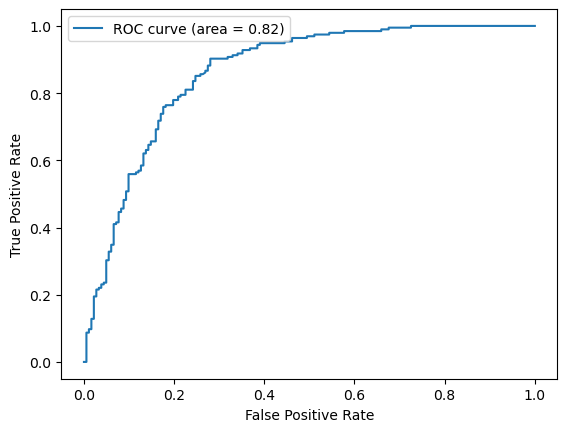

In [100]:
y_pred = rfe_adaboost2.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Precision:', metrics.precision_score(y_test, y_pred))
print('Recall:', metrics.recall_score(y_test, y_pred))
print('AUC Score:', metrics.roc_auc_score(y_test, y_pred))
confusion = metrics.confusion_matrix(y_test, y_pred)

auc_AB2 = metrics.roc_auc_score(y_test, y_pred)
y_pred_proba = SVM.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(['ROC curve (area = %0.2f)' % auc_AB2])
plt.show()
methodDict2['Adaboost'] = auc_AB2 * 100

Accuracy: 0.830238726790451
Precision: 0.8075117370892019
Recall: 0.882051282051282
AUC Score: 0.8283882783882783


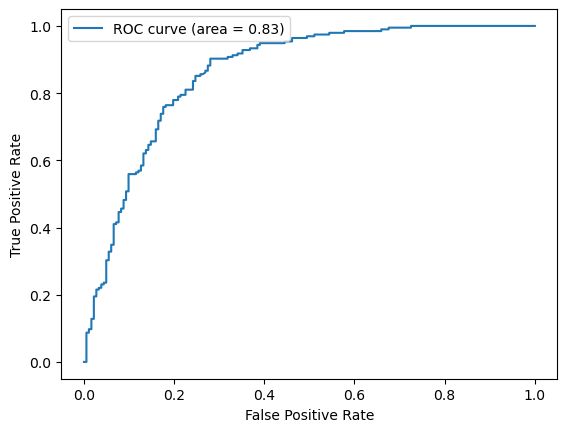

In [101]:
y_pred = rfe_gradient2.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Precision:', metrics.precision_score(y_test, y_pred))
print('Recall:', metrics.recall_score(y_test, y_pred))
print('AUC Score:', metrics.roc_auc_score(y_test, y_pred))
confusion = metrics.confusion_matrix(y_test, y_pred)

auc_GB2 = metrics.roc_auc_score(y_test, y_pred)
y_pred_proba = SVM.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(['ROC curve (area = %0.2f)' % auc_GB2])
plt.show()
methodDict2['Gradient Boosting'] = auc_GB2 * 100

In [102]:
'''
y_pred = rfe_xg2.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Precision:', metrics.precision_score(y_test, y_pred))
print('Recall:', metrics.recall_score(y_test, y_pred))
print('AUC Score:', metrics.roc_auc_score(y_test, y_pred))
confusion = metrics.confusion_matrix(y_test, y_pred)

roc_auc = metrics.roc_auc_score(y_test, y_pred)
y_pred_proba = SVM.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
methodDict2['XG Boost'] = roc_auc * 100

'''


"\ny_pred = rfe_xg2.predict(X_test)\nprint('Accuracy:', metrics.accuracy_score(y_test, y_pred))\nprint('Precision:', metrics.precision_score(y_test, y_pred))\nprint('Recall:', metrics.recall_score(y_test, y_pred))\nprint('AUC Score:', metrics.roc_auc_score(y_test, y_pred))\nconfusion = metrics.confusion_matrix(y_test, y_pred)\n\nroc_auc = metrics.roc_auc_score(y_test, y_pred)\ny_pred_proba = SVM.predict_proba(X_test)[:, 1]\nfpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)\nmethodDict2['XG Boost'] = roc_auc * 100\n\n"

Accuracy: 0.8090185676392573
Precision: 0.7733333333333333
Recall: 0.8923076923076924
AUC Score: 0.806043956043956


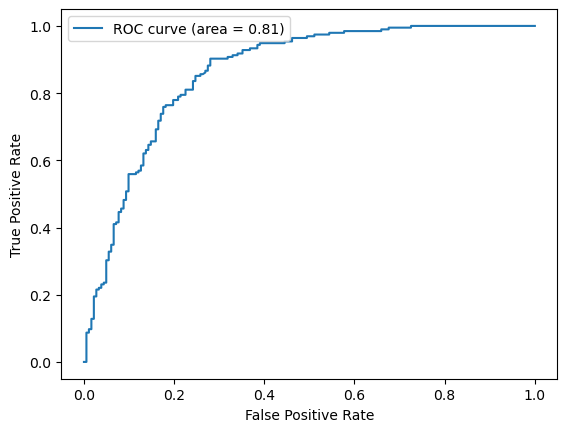

In [103]:
y_pred = rfe_SVM2.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Precision:', metrics.precision_score(y_test, y_pred))
print('Recall:', metrics.recall_score(y_test, y_pred))
print('AUC Score:', metrics.roc_auc_score(y_test, y_pred))
confusion = metrics.confusion_matrix(y_test, y_pred)

auc_sv2 = metrics.roc_auc_score(y_test, y_pred)
y_pred_proba = SVM.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(['ROC curve (area = %0.2f)' % auc_sv2])
plt.show()
methodDict2['SVM'] = auc_sv2 * 100

In [104]:
# Subset the features selected by rfe1
col1 = X_train.columns[rfe_logistic2.support_]

# Subsetting training data for 15 selected columns
X_train_rfe2 = X_train[col1]
data_vif = pd.DataFrame()
data_vif['Features'] = X_train_rfe2.columns
data_vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
data_vif['VIF'] = round(data_vif['VIF'], 2)
data_vif = data_vif.sort_values(by = "VIF", ascending = False)
data_vif

,Features,VIF
1,Gender,9.54
2,Country,7.19
5,tech_company,5.12
0,Age,4.89
7,seek_help,3.54
8,coworkers,3.38
4,work_interfere,3.31
6,benefits,3.17
3,family_history,1.81
9,obs_consequence,1.25


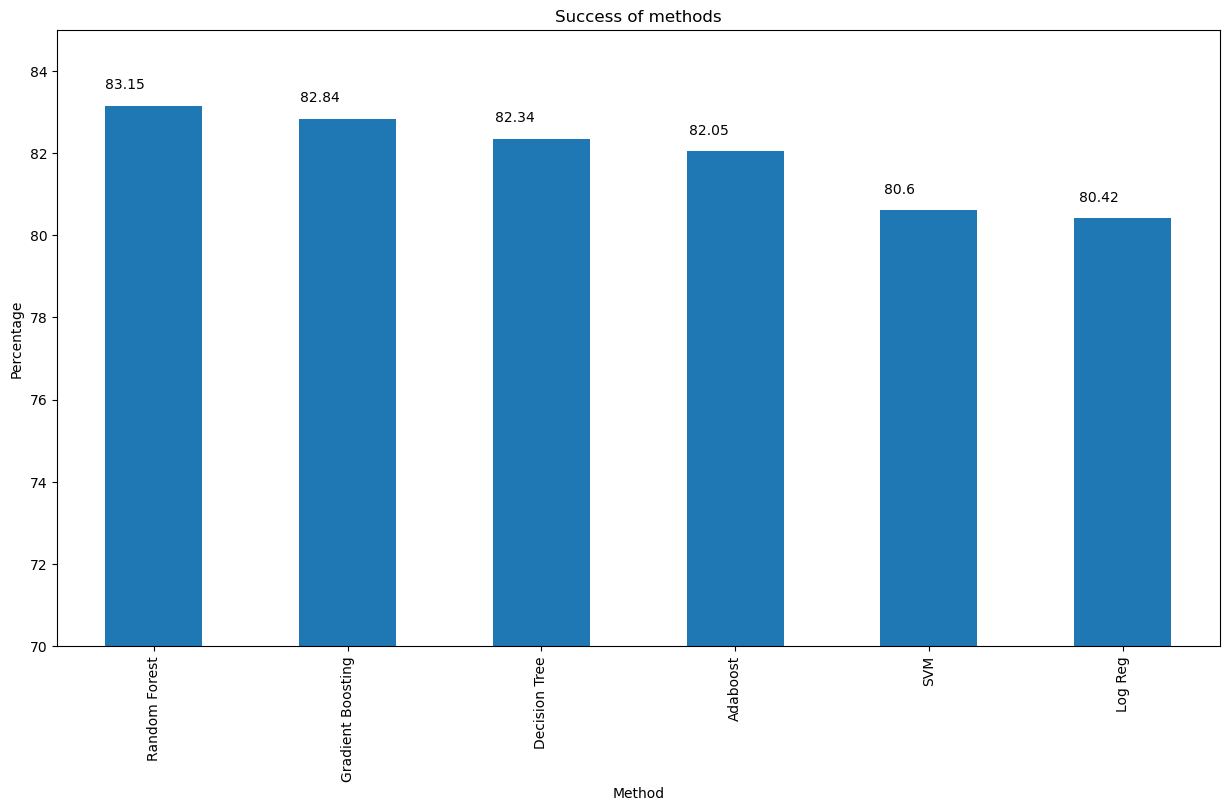

In [105]:
s = pd.Series(methodDict2)
s = s.sort_values(ascending=False)
plt.figure(figsize=(15,8))
#Colors
ax = s.plot(kind='bar') 
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.ylim([70.0, 85.0])
plt.xlabel('Method')
plt.ylabel('Percentage')
plt.title('Success of methods')
     
plt.show()

 Lets try and drop 2 more columns to see if the accuracy increases any further

In [106]:
# Building model using first 8 features with maximum vif value
No_of_features=8
rfe_logistic3 = RFE(lr,n_features_to_select=No_of_features)
rfe_tree3 = RFE(tree_, n_features_to_select=No_of_features)
rfe_random3 = RFE(random, n_features_to_select=No_of_features)
rfe_adaboost3 = RFE(adaboost_model, n_features_to_select=No_of_features)
rfe_gradient3 = RFE(gradient_model, n_features_to_select=No_of_features)
rfe_knn3 = RFE(knn, n_features_to_select=No_of_features)
rfe_SVM3 = RFE(sv, n_features_to_select=No_of_features)

# Fit with 8 features
rfe_logistic3.fit(X_train, y_train)
rfe_tree3.fit(X_train, y_train)
rfe_random3.fit(X_train, y_train)
rfe_adaboost3.fit(X_train, y_train)
rfe_gradient3.fit(X_train, y_train)
#rfe_knn1.fit(X_train, y_train) RFE doesn't work for KNN algorithm
rfe_SVM3.fit(X_train, y_train)

methodDict3 = {}

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

### Models Evaluation using 8 Features of RFE

Accuracy: 0.8090185676392573
Precision: 0.7942583732057417
Recall: 0.8512820512820513
AUC Score: 0.8075091575091575


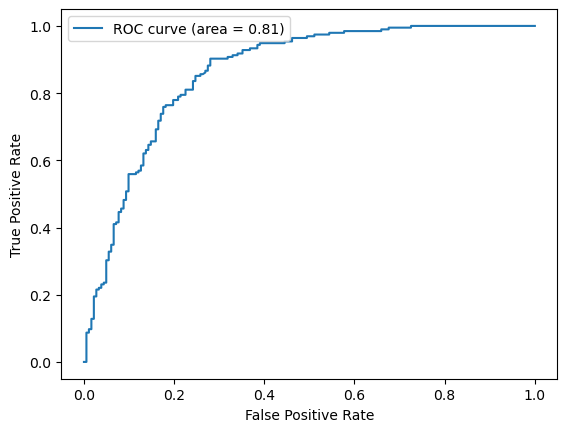

In [107]:
y_pred = rfe_logistic3.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Precision:', metrics.precision_score(y_test, y_pred))
print('Recall:', metrics.recall_score(y_test, y_pred))
print('AUC Score:', metrics.roc_auc_score(y_test, y_pred))
confusion = metrics.confusion_matrix(y_test, y_pred)

auc_log3 = metrics.roc_auc_score(y_test, y_pred)
y_pred_proba = SVM.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(['ROC curve (area = %0.2f)' % auc_log3])
plt.show()
methodDict3['Log Reg'] = auc_log3 * 100

Accuracy: 0.8275862068965517
Precision: 0.773109243697479
Recall: 0.9435897435897436
AUC Score: 0.8234432234432234


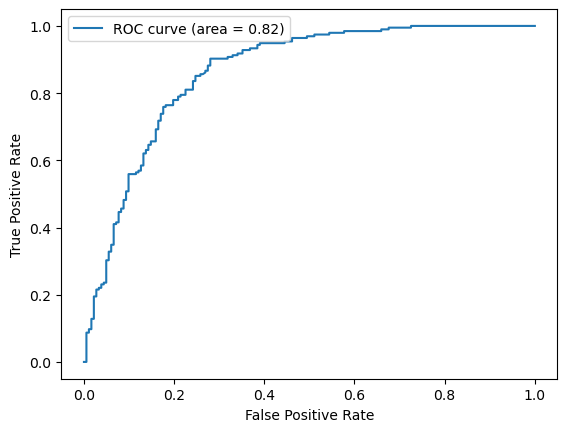

In [108]:
y_pred = rfe_tree3.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Precision:', metrics.precision_score(y_test, y_pred))
print('Recall:', metrics.recall_score(y_test, y_pred))
print('AUC Score:', metrics.roc_auc_score(y_test, y_pred))
confusion = metrics.confusion_matrix(y_test, y_pred)

auc_DT3 = metrics.roc_auc_score(y_test, y_pred)
y_pred_proba = SVM.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(['ROC curve (area = %0.2f)' % auc_DT3])
plt.show()
methodDict3['Decision Tree'] = auc_DT3 * 100

Accuracy: 0.8037135278514589
Precision: 0.7980295566502463
Recall: 0.8307692307692308
AUC Score: 0.8027472527472529


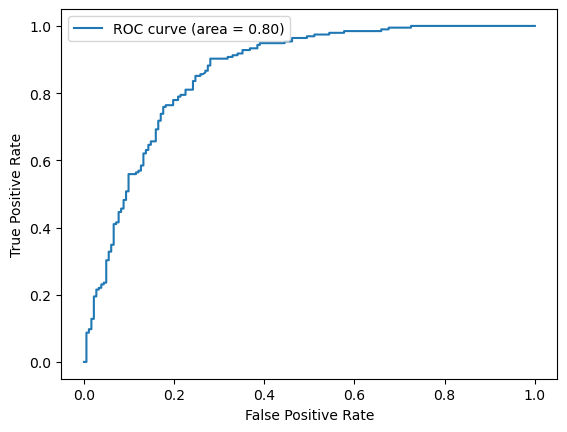

In [109]:
y_pred = rfe_random3.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Precision:', metrics.precision_score(y_test, y_pred))
print('Recall:', metrics.recall_score(y_test, y_pred))
print('AUC Score:', metrics.roc_auc_score(y_test, y_pred))
confusion = metrics.confusion_matrix(y_test, y_pred)

auc_RF3 = metrics.roc_auc_score(y_test, y_pred)
y_pred_proba = SVM.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(['ROC curve (area = %0.2f)' % auc_RF3])
plt.show()
methodDict3['Random Forest'] = auc_RF3 * 100

Accuracy: 0.8143236074270557
Precision: 0.7906976744186046
Recall: 0.8717948717948718
AUC Score: 0.8122710622710623


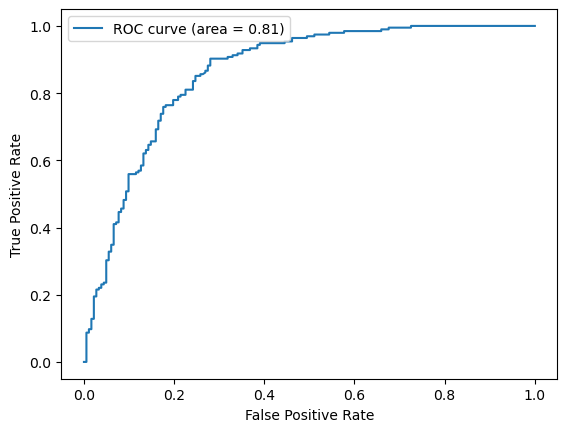

In [111]:
y_pred = rfe_adaboost3.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Precision:', metrics.precision_score(y_test, y_pred))
print('Recall:', metrics.recall_score(y_test, y_pred))
print('AUC Score:', metrics.roc_auc_score(y_test, y_pred))
confusion = metrics.confusion_matrix(y_test, y_pred)

auc_AB3 = metrics.roc_auc_score(y_test, y_pred)
y_pred_proba = SVM.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(['ROC curve (area = %0.2f)' % auc_AB3])
plt.show()
methodDict3['Adaboost'] = auc_AB3 * 100

Accuracy: 0.8249336870026526
Precision: 0.8
Recall: 0.882051282051282
AUC Score: 0.8228937728937729


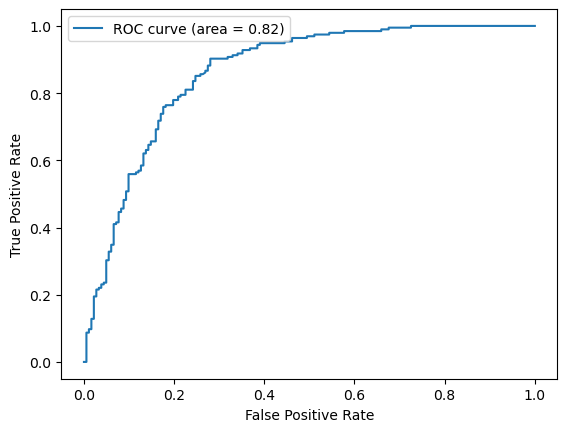

In [112]:
y_pred = rfe_gradient3.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Precision:', metrics.precision_score(y_test, y_pred))
print('Recall:', metrics.recall_score(y_test, y_pred))
print('AUC Score:', metrics.roc_auc_score(y_test, y_pred))
confusion = metrics.confusion_matrix(y_test, y_pred)

auc_GB3 = metrics.roc_auc_score(y_test, y_pred)
y_pred_proba = SVM.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(['ROC curve (area = %0.2f)' % auc_GB3])
plt.show()
methodDict3['Gradient Boosting'] = auc_GB3 * 100

Accuracy: 0.8010610079575596
Precision: 0.7727272727272727
Recall: 0.8717948717948718
AUC Score: 0.7985347985347985


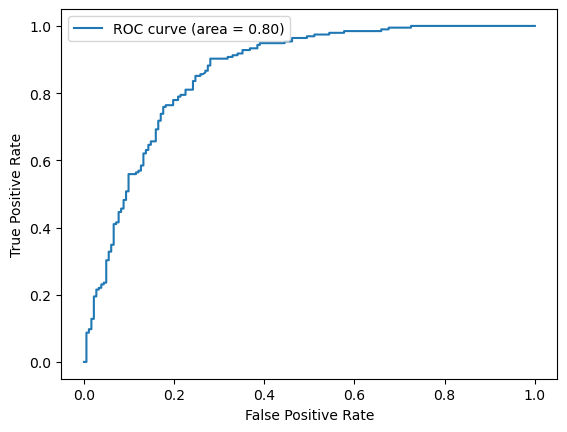

In [113]:
y_pred = rfe_SVM3.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Precision:', metrics.precision_score(y_test, y_pred))
print('Recall:', metrics.recall_score(y_test, y_pred))
print('AUC Score:', metrics.roc_auc_score(y_test, y_pred))
confusion = metrics.confusion_matrix(y_test, y_pred)

auc_sv3 = metrics.roc_auc_score(y_test, y_pred)
y_pred_proba = SVM.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(['ROC curve (area = %0.2f)' % auc_sv3])
plt.show()
methodDict3['SVM'] = auc_sv3 * 100

The accuracy seems to be dropped by 1% after doing 8 features selection

In [114]:
# Subset the features selected by rfe2
col2 = X_train.columns[rfe_logistic3.support_]

# Subsetting training data for 15 selected columns
X_train_rfe3 = X_train[col2]
data_vif = pd.DataFrame()
data_vif['Features'] = X_train_rfe3.columns
data_vif['VIF'] = [variance_inflation_factor(X_train_rfe3.values, i) for i in range(X_train_rfe3.shape[1])]
data_vif['VIF'] = round(data_vif['VIF'], 2)
data_vif = data_vif.sort_values(by = "VIF", ascending = False)
data_vif

,Features,VIF
1,Gender,7.72
2,Country,7.05
0,Age,4.85
4,work_interfere,3.28
6,coworkers,3.28
5,benefits,2.65
3,family_history,1.81
7,obs_consequence,1.22


#### Hence we are good with top 10 features for our model

{'Log Reg': 80.75091575091575, 'Decision Tree': 82.34432234432234, 'Random Forest': 80.27472527472528, 'Adaboost': 81.22710622710623, 'Gradient Boosting': 82.28937728937728, 'SVM': 79.85347985347985}


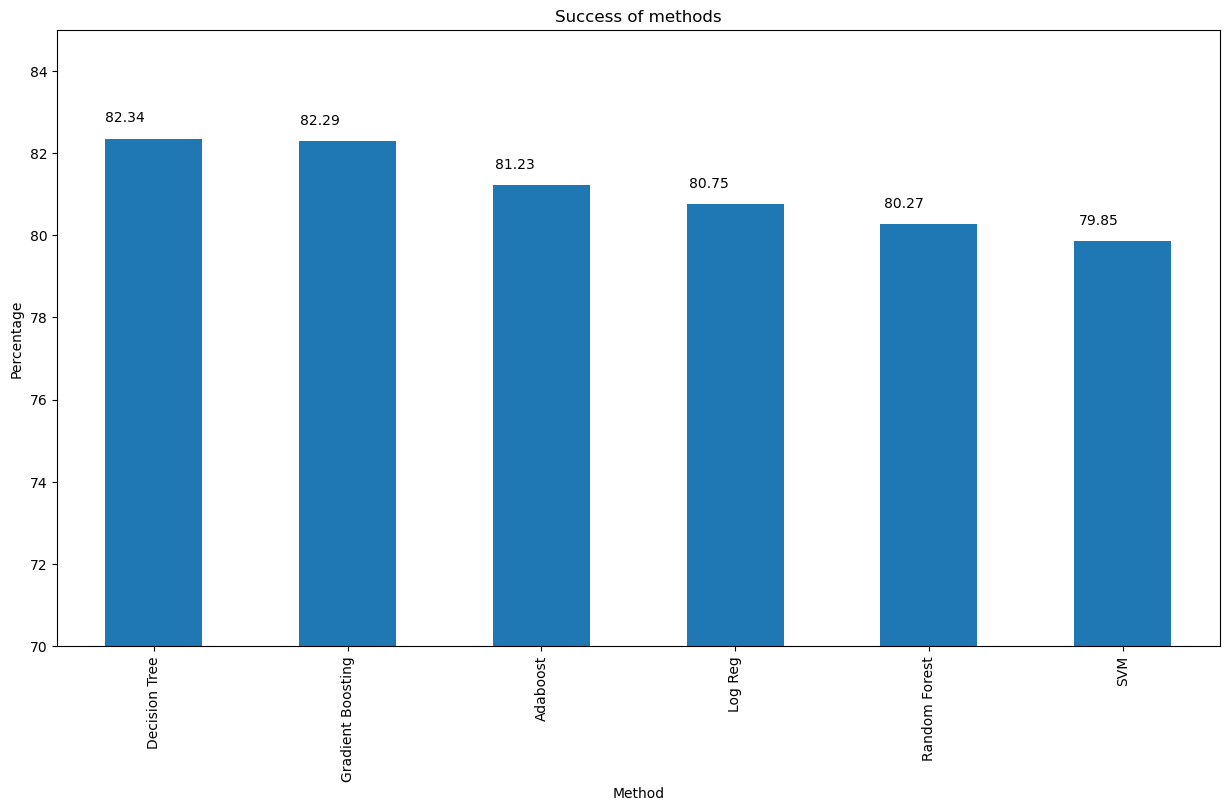

In [115]:
print(methodDict3)
s = pd.Series(methodDict3)
s = s.sort_values(ascending=False)
plt.figure(figsize=(15,8))
#Colors
ax = s.plot(kind='bar') 
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.ylim([70.0, 85.0])
plt.xlabel('Method')
plt.ylabel('Percentage')
plt.title('Success of methods')
     
plt.show()

#### Checking the correlations between the final predictor variables

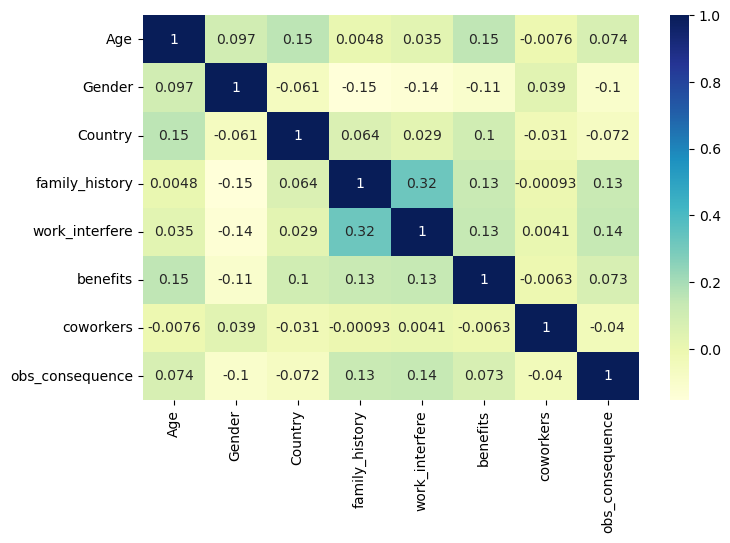

In [116]:
# Figure size
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(data[col2].corr(), cmap="YlGnBu", annot=True)
plt.show()